In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import combinations
import os
import shutil
import numpy as np
from collections import namedtuple
final_report_dic={}
from housing.constant import *
ROOT_DIR=ROOT_DIR_PLOTS

In [5]:
train_file_path="/config/workspace/housing/artifact/data_injection/2023_03_28_13_27_25/ingested_data/train/housing.csv"
test_file_path="/config/workspace/housing/artifact/data_injection/2023_03_28_13_27_25/ingested_data/test/housing.csv"
df_train=pd.read_csv(train_file_path)

In [6]:
## output column
target_col_name='median_house_value'

In [7]:
# to drop the output column
df_train_new=df_train.drop(columns=df_train.columns[0])

In [8]:
# to find the null value columns 
all_na_col=[ (col,df_train_new[col].isna().sum(), round( df_train_new[col].isna().sum()/len(df_train_new),2)) \
for col in df_train_new if df_train_new[col].isna().sum()>1 ]

In [9]:
### to update all null valecolumns in final dic 
final_report_dic.update(  {"all_null_value_columns":all_na_col}  )

In [10]:
## to find the all columns unique values
all_col_nuniques=[ (col,df_train_new[col].nunique()) for col in df_train_new.columns ]

In [11]:
### to update final_report_dic
final_report_dic.update({"number_of_unique_values":all_col_nuniques})

In [12]:
### to find the all discreate columns
n_col_thersold=25## assumption
dicreate_val_col=[ (col,df_train_new[col].nunique()) for col in df_train_new.columns if df_train_new[col].nunique()<=n_col_thersold]

In [13]:
## update final_report_dic dict
final_report_dic.update({"dicreate_val_col":dicreate_val_col})

In [14]:
##find the un noraml dist feature using pandas
skew=df_train_new.skew()
all_unormal_skweness=[  (col,val) for col,val in zip(skew.index,skew.values) if val<0 or val>1]

In [15]:
### to update final_report_dic dict
final_report_dic.update( {"un_normal_dist_col":all_unormal_skweness}  )

# Data Visualaization

In [16]:
## to find all numeric colums 
all_numeric_col=[col for col in df_train_new.columns if df_train_new[col].dtypes!='O' and 'C']

In [17]:
### to update final_report_dic dict
final_report_dic.update( {"all_numeric_col":all_numeric_col}  )

In [18]:
### to find the oulier using IQR method 
def find_the_outlier_using_IQR(df:pd.DataFrame,thersold:float=1.5)->dict:
  final_outlier_dic={}
  try:
    for col in df.columns:
      if df[col].dtypes!='O' and 'C':
        per_25,per_75=np.percentile(df[col].dropna(),[25,75])
        iqr=per_75-per_25
        lower_limit,upper_limit=per_25-(thersold*iqr),(thersold*iqr)+per_75
        ind=list(np.where(   (df[col]>upper_limit)  |  (df[col]<lower_limit)   )[0])
        final_outlier_dic.update( {col:ind} )
    return final_outlier_dic
  except Exception as e:
    raise e


In [19]:
all_outlier_col_using_IQR_method=find_the_outlier_using_IQR(df_train_new)
final_report_dic.update({"all_outlier_col_dic":all_outlier_col_using_IQR_method})

In [20]:
all_outlier_col_using_IQR_method

{'longitude': [],
 'latitude': [],
 'housing_median_age': [],
 'total_rooms': [3,
  9,
  11,
  22,
  27,
  32,
  33,
  34,
  36,
  37,
  60,
  94,
  105,
  107,
  149,
  156,
  162,
  176,
  204,
  215,
  216,
  232,
  260,
  262,
  275,
  277,
  301,
  326,
  362,
  370,
  374,
  392,
  398,
  408,
  434,
  436,
  440,
  442,
  446,
  455,
  496,
  498,
  500,
  507,
  531,
  540,
  554,
  578,
  596,
  618,
  635,
  662,
  667,
  685,
  709,
  717,
  721,
  789,
  797,
  798,
  852,
  861,
  885,
  912,
  917,
  939,
  958,
  962,
  992,
  1032,
  1057,
  1139,
  1150,
  1161,
  1170,
  1172,
  1174,
  1183,
  1216,
  1220,
  1229,
  1243,
  1251,
  1275,
  1328,
  1342,
  1371,
  1373,
  1395,
  1411,
  1445,
  1447,
  1464,
  1465,
  1490,
  1527,
  1532,
  1535,
  1550,
  1561,
  1568,
  1570,
  1572,
  1602,
  1606,
  1619,
  1621,
  1625,
  1645,
  1661,
  1666,
  1669,
  1675,
  1681,
  1704,
  1710,
  1738,
  1747,
  1751,
  1771,
  1789,
  1793,
  1798,
  1807,
  1810,
  1811

In [21]:
### to find the outlier using std diviation method
def find_outliers_uisng_std(df:pd.DataFrame,thersold:float=3)->dict:
  final_outlier_dic={}
  try:
    for col in df.columns:
      if df[col].dtypes!='O' and 'C':
        std=np.std( df[col].dropna() )
        limit=thersold*std
        ind=list(np.where(   ( df[col]> limit) | (df[col]<-limit)    )[0])
        final_outlier_dic.update(  {col:ind} )

    return final_outlier_dic

  except Exception as e:
    raise e


In [22]:
all_oulier_using_std=find_outliers_uisng_std(df_train_new)
## to update the dic
final_report_dic.update(  {"all_oulier_using_std":all_oulier_using_std}  )

In [23]:
all_numeric_col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [24]:
# shutil.rmtree('/content/all_graphs')

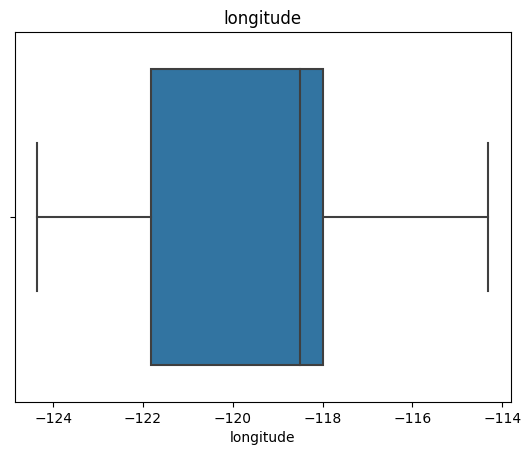

sucessfully file saved path is housing/all_plots/boxplots_2023_03_30_06_08_49/longitude_plot.png


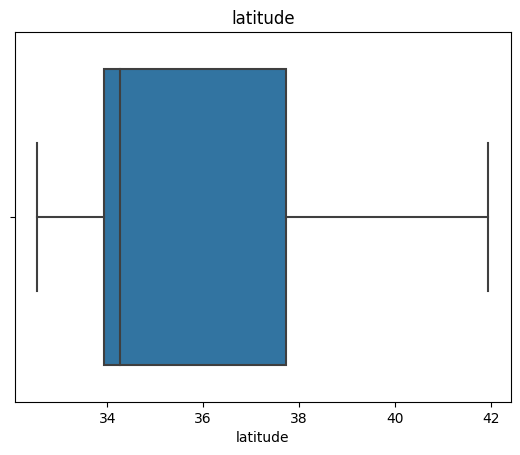

sucessfully file saved path is housing/all_plots/boxplots_2023_03_30_06_08_49/latitude_plot.png


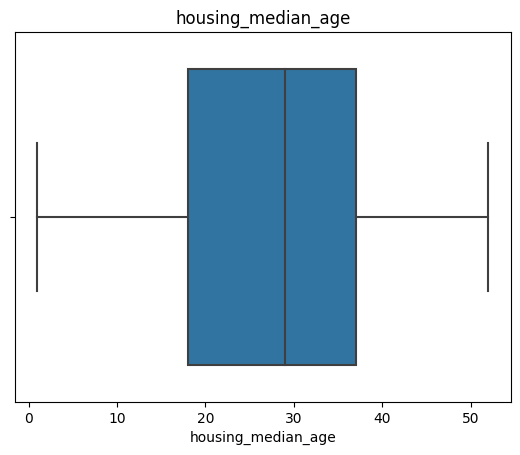

sucessfully file saved path is housing/all_plots/boxplots_2023_03_30_06_08_49/housing_median_age_plot.png


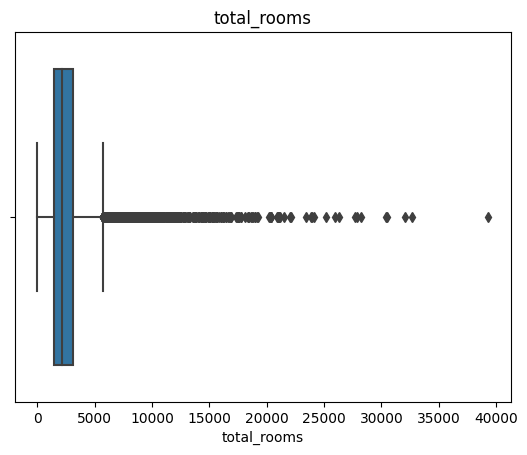

sucessfully file saved path is housing/all_plots/boxplots_2023_03_30_06_08_49/total_rooms_plot.png


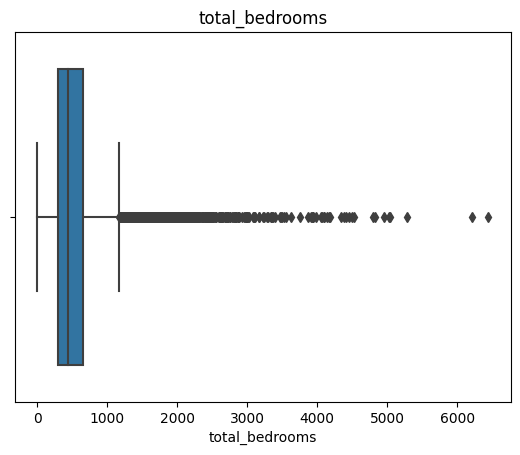

sucessfully file saved path is housing/all_plots/boxplots_2023_03_30_06_08_49/total_bedrooms_plot.png


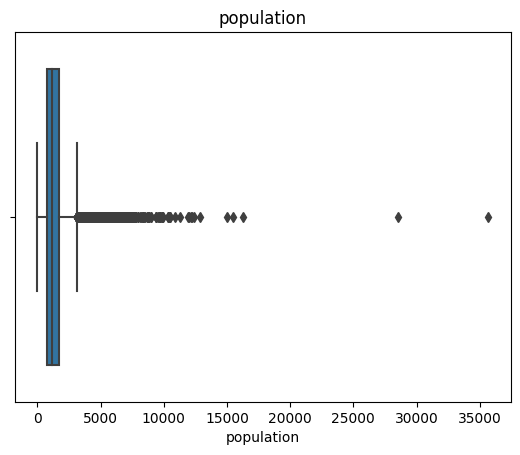

sucessfully file saved path is housing/all_plots/boxplots_2023_03_30_06_08_49/population_plot.png


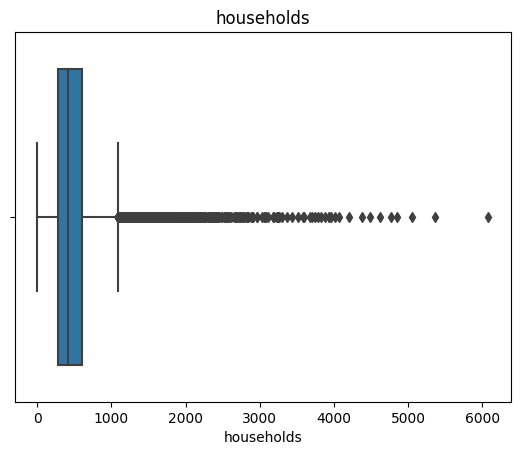

sucessfully file saved path is housing/all_plots/boxplots_2023_03_30_06_08_49/households_plot.png


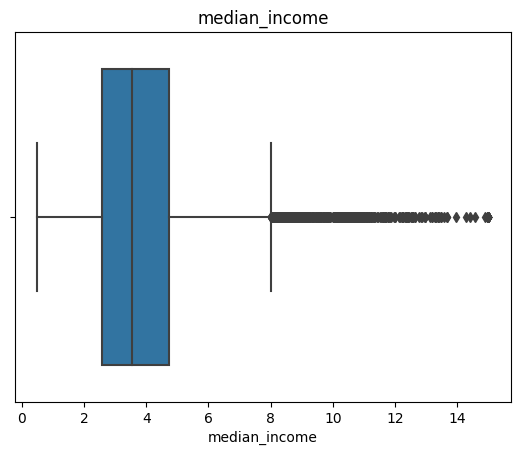

sucessfully file saved path is housing/all_plots/boxplots_2023_03_30_06_08_49/median_income_plot.png


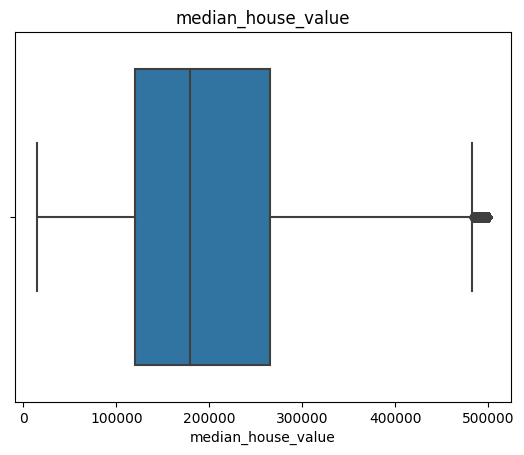

sucessfully file saved path is housing/all_plots/boxplots_2023_03_30_06_08_49/median_house_value_plot.png


In [25]:
## find the outliers using boxplot
all_numeric_col=[col for col in df_train_new.columns if df_train_new[col].dtypes!='O' and 'C']
# ROOT_DIR="all_graphs"
from datetime import datetime 
time_stamp=datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
box_plot_folder_name=f"boxplots_{time_stamp}"
import os
os.makedirs(os.path.join(ROOT_DIR,box_plot_folder_name),exist_ok=True)

for col in all_numeric_col:
    plt.title(col)
    sns.boxplot(x=df_train_new[col])
    file_path=os.path.join(
        ROOT_DIR,
        box_plot_folder_name,
        f'{col}_plot.png'
    )
    plt.savefig(file_path)
    plt.show()
    print(f'sucessfully file saved path is {file_path}')
    print('===='*20)

## conclusion

columns to present lot of outliers

1 median house value

2.mdeian income

3.housholds

4.total bedrooms

4.total rooms

5.total rooms


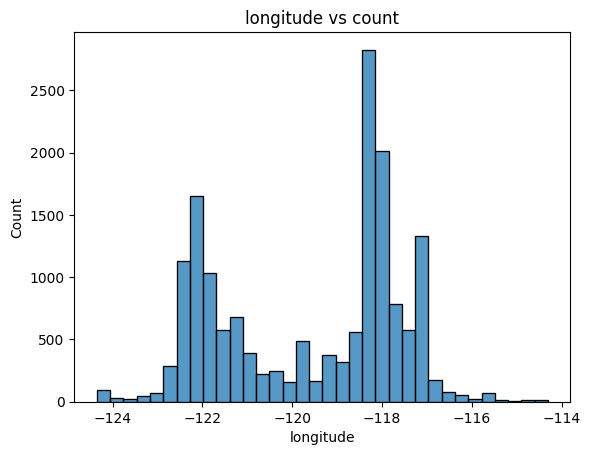

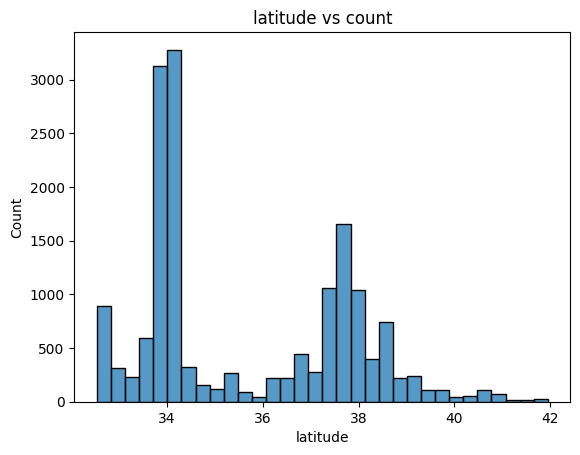

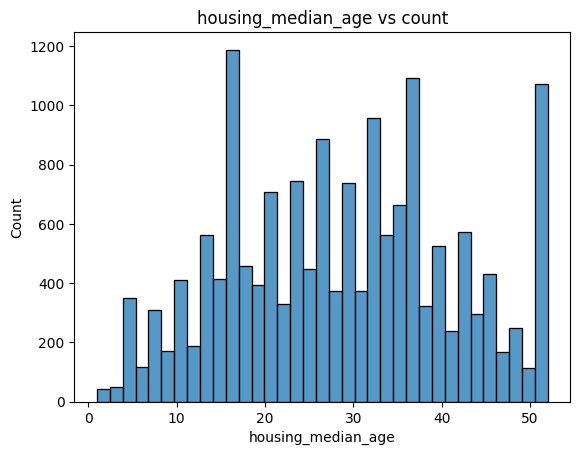

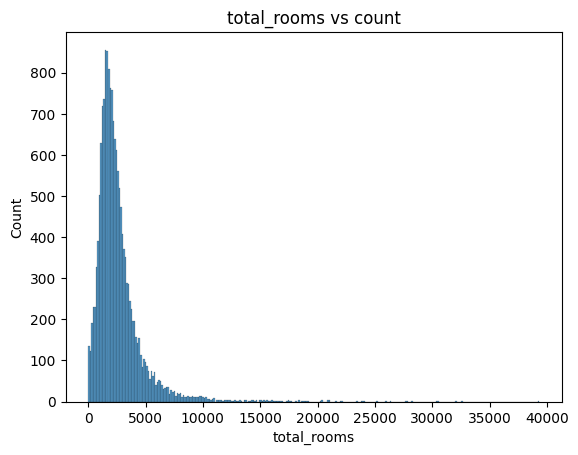

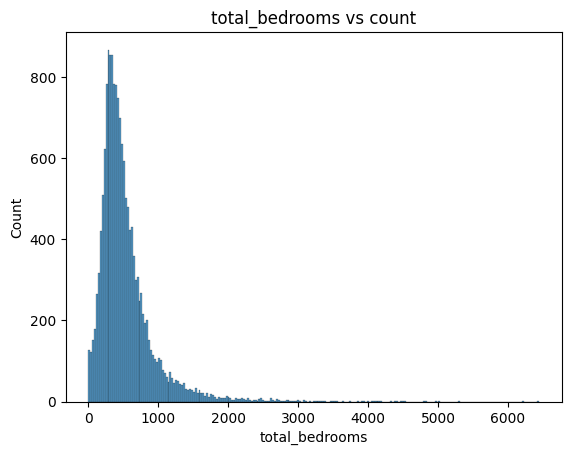

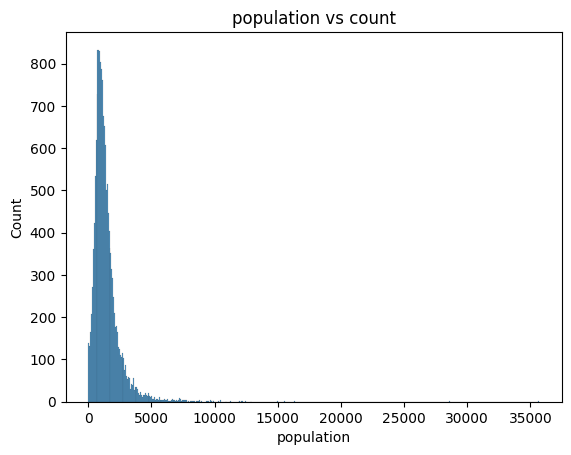

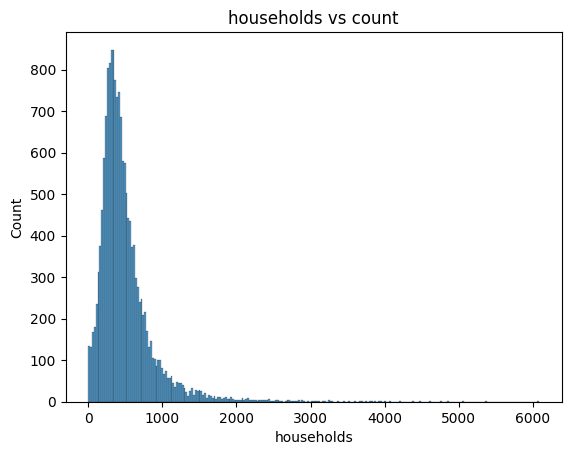

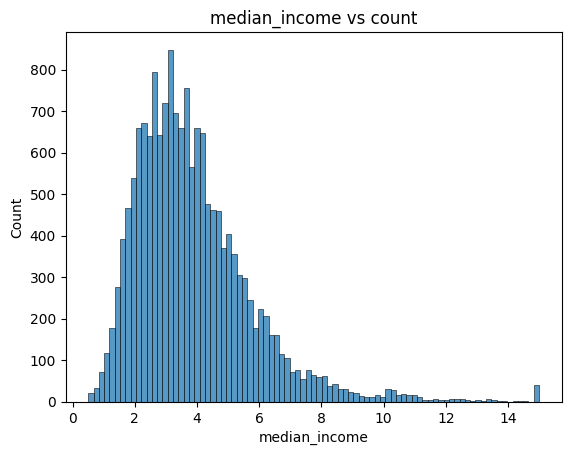

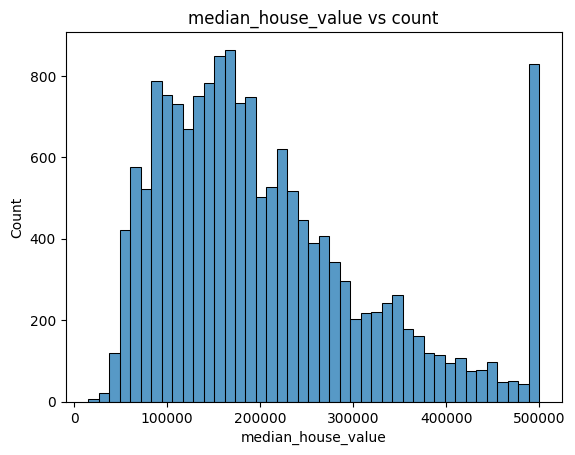

In [26]:
## distribution of data 
histogram_folder_name=f'histogram_{time_stamp}'
histogram_folder_path=os.path.join(ROOT_DIR,histogram_folder_name)
os.makedirs(histogram_folder_path,exist_ok=True)
for col in all_numeric_col:
    plt.title(f'{col} vs count')
    plt.xlabel(col)
    plt.ylabel('Count')
    sns.histplot(x=df_train_new[col])
    file_path=os.path.join(
        histogram_folder_path,
        f'{col}_plot.png'
    )
    plt.savefig(file_path)
    plt.show()
    print('==='*10)

## columns to log or power law disribution

1.total bedrooms

2.total rooms

3.households

4.papulatios

In [27]:
## analize the cat features 
all_cat_columns=[ (col) for col in df_train_new.columns if df_train_new[col].dtypes=='O' and 'C']

In [28]:
# update final_dic

final_report_dic.update(  {"all_cat_columns":all_cat_columns} )

In [29]:
## find the all discrete col nuniques
all_cat_columns=[col for col in df_train_new.columns if df_train_new[col].dtypes=='O' and 'C']
all_dicreate_col_nunique_=[(col,df_train_new[col].nunique()) for col in all_cat_columns]

In [30]:
## update the final dic
final_report_dic.update({"all_dicreate_col_nunique":all_dicreate_col_nunique_})

In [31]:
all_dicreate_col_nunique=[(col,df_train_new[col].nunique()) for col in all_cat_columns]

In [32]:
all_dicreate_col_nunique

[('ocean_proximity', 5)]

In [33]:
## to group by all discreate columns 
grp_by=df_train_new.groupby(all_dicreate_col_nunique[0][0])[target_col_name]

In [34]:
### to all uniques median value(based on output col)
all_medin_val=[np.median(grp[1]) for grp in grp_by]

In [35]:
#### to update the final dic
all_uniques=df_train_new[all_dicreate_col_nunique[0][0]]
all_median_val_named_tuple_based_on_discrete_col=[  (uni,val)   for uni,val in zip(all_uniques,all_medin_val)   ]

final_report_dic.update(  {"all_median_val_named_tuple_based_on_discrete_col":all_median_val_named_tuple_based_on_discrete_col}   )

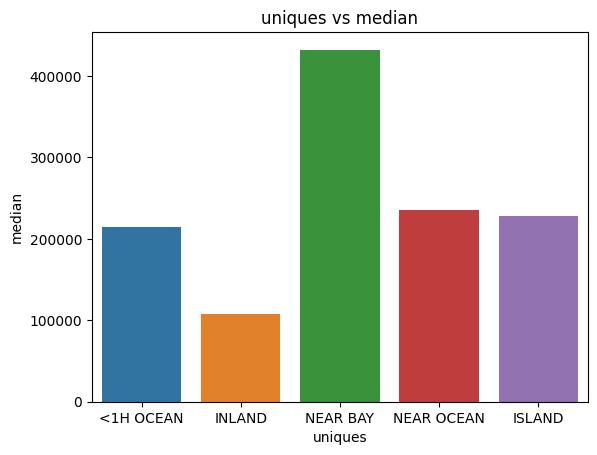

In [36]:
### bar plot median vs grp
bar_plot_folder_name=f'barplots_{time_stamp}'
bar_plot_folder_path=os.path.join(ROOT_DIR,bar_plot_folder_name)
os.makedirs(bar_plot_folder_path,exist_ok=True)
plt.title(f'uniques vs median')
plt.xlabel('uniques')
plt.ylabel('median')
sns.barplot(y=all_medin_val,x=df_train_new[all_dicreate_col_nunique[0][0]].unique())
file_path=os.path.join(
  bar_plot_folder_path,
  f'uniques_vs_median_plot.png'  
)
plt.savefig(file_path)

## conclusions

1.NEAR BAY median house value more then comapre all other unique 

2.INLAND unique median very low compare to  comapre all other unique 


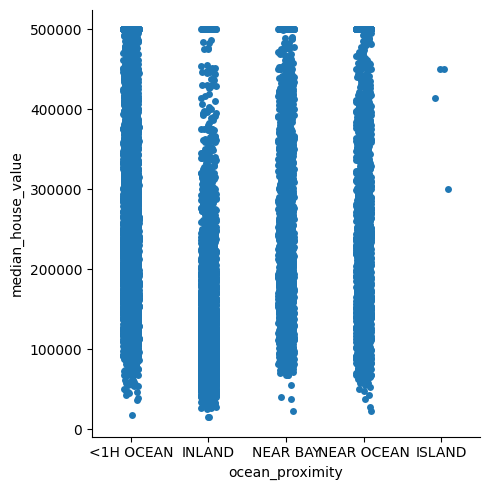

In [37]:
## count the cat features
count_plot_folder_name=f'countplots_{time_stamp}'
count_plot_folder_path=os.path.join(ROOT_DIR,count_plot_folder_name)
os.makedirs(count_plot_folder_path,exist_ok=True)
sns.catplot(x=df_train_new[all_dicreate_col_nunique[0][0]],y=df_train_new[target_col_name])
file_path=os.path.join(count_plot_folder_path,
                       f'uniques_vs_median_countplot.png')
plt.savefig(file_path)


## conclusions

1.NEAR BAY median house value more then comapre all other unique 

2.INLAND unique median very low compare to  comapre all other unique 

3.vey less pepole buy the house in ISLAND category 

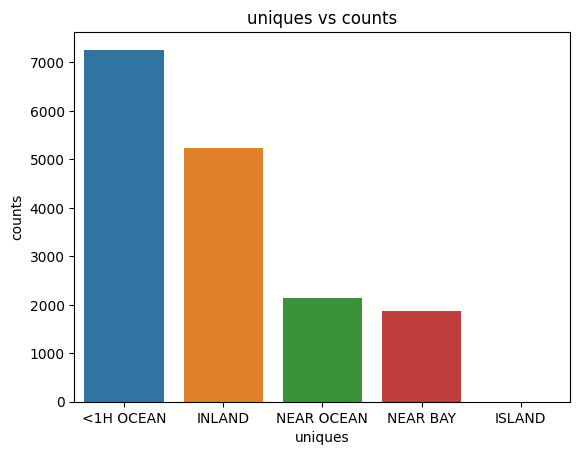

In [38]:
### count the ocean_proxity unique values
ocean_proxity_value_counts=df_train_new[all_dicreate_col_nunique[0][0]].value_counts()
count_plot_folder_name=f'countplots_{time_stamp}'
count_plot_folder_path=os.path.join(ROOT_DIR,count_plot_folder_name)
os.makedirs(count_plot_folder_path,exist_ok=True)
file_path=os.path.join(count_plot_folder_path,
                       f'uniques_vs_count.png')
plt.title('uniques vs counts')
plt.xlabel('uniques')
plt.ylabel('counts')
sns.barplot(x=ocean_proxity_value_counts.index,y=list(ocean_proxity_value_counts.values))
plt.savefig(file_path)

## conclusions

1.pepole mostly prefer <1H OCEAN category house 

2.ver less less no of pepole  prefer ISLAND category house 

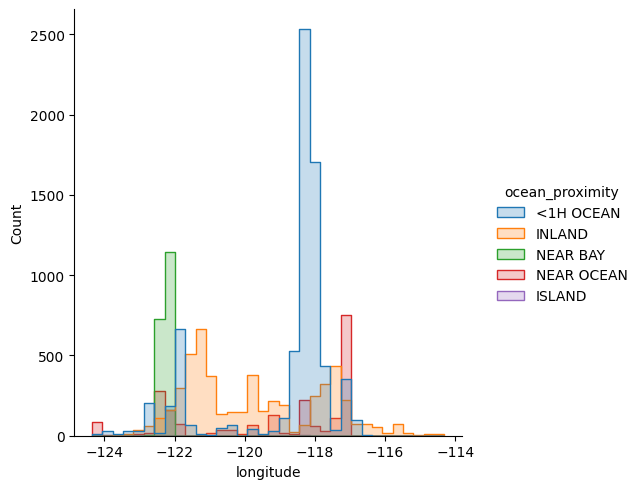

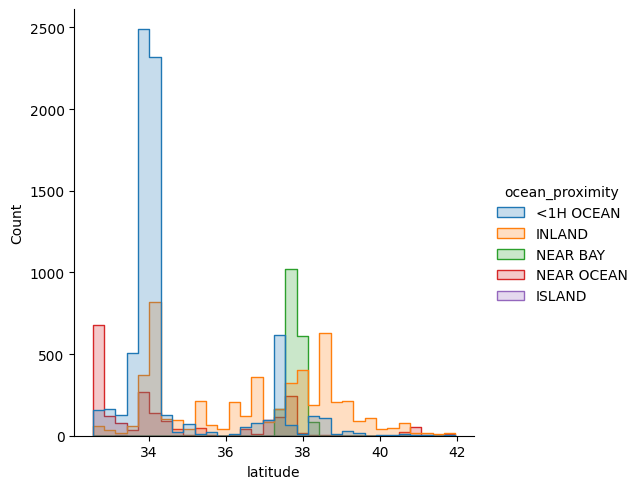

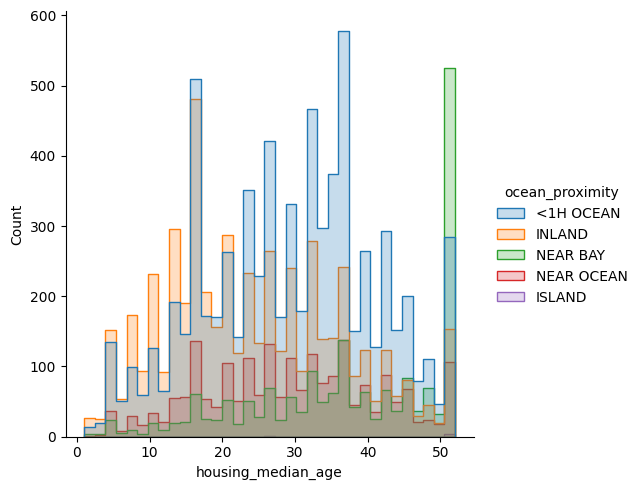

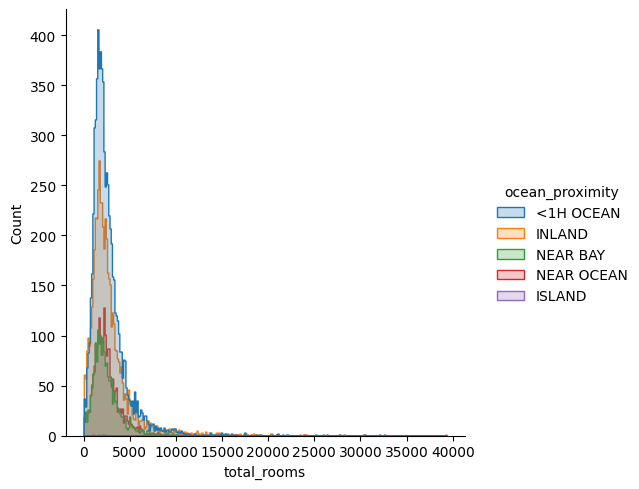

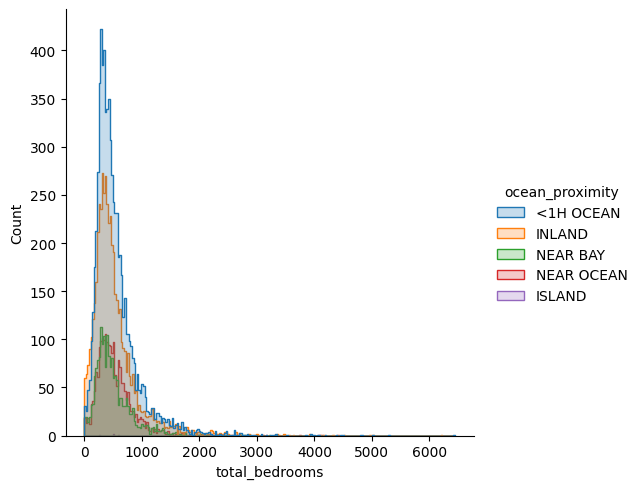

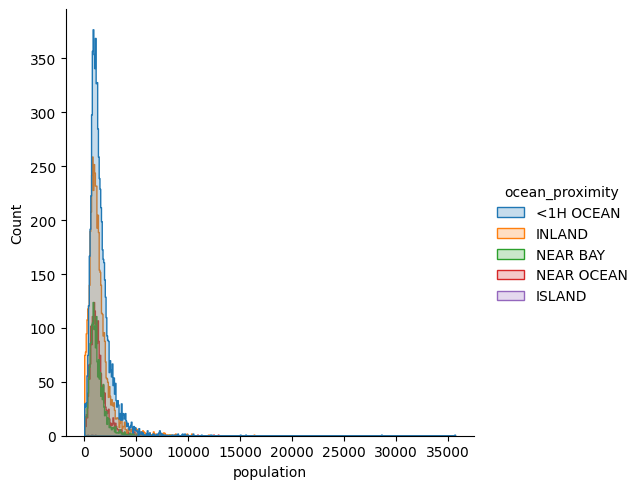

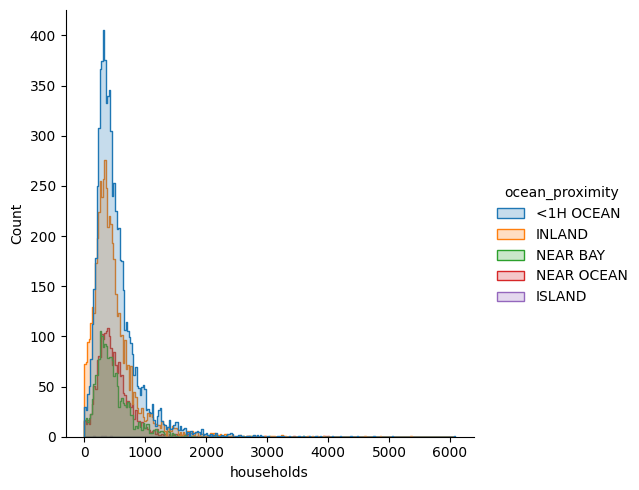

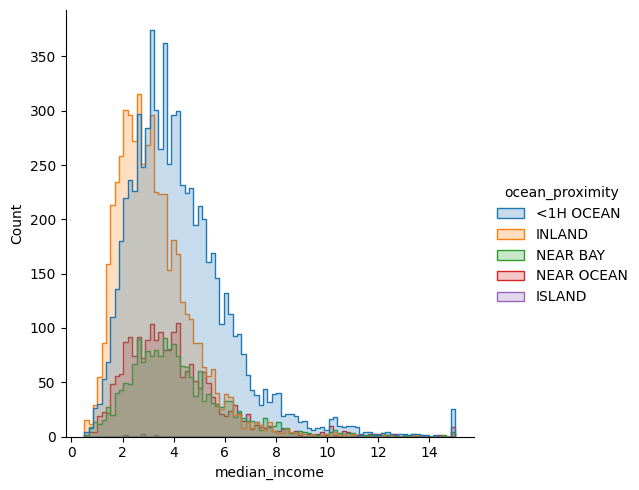

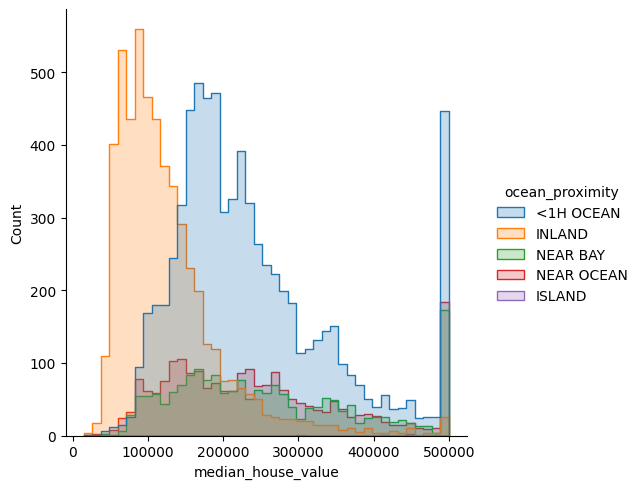

In [39]:
### distribution plot
for col in all_numeric_col: 
    
    sns.displot(x=df_train_new[col], hue=df_train_new.ocean_proximity, element="step")
    file_path=os.path.join(
        histogram_folder_path,
        f'{col}_vs_ocean_proximity_distplot.pns'
    )
    plt.show()

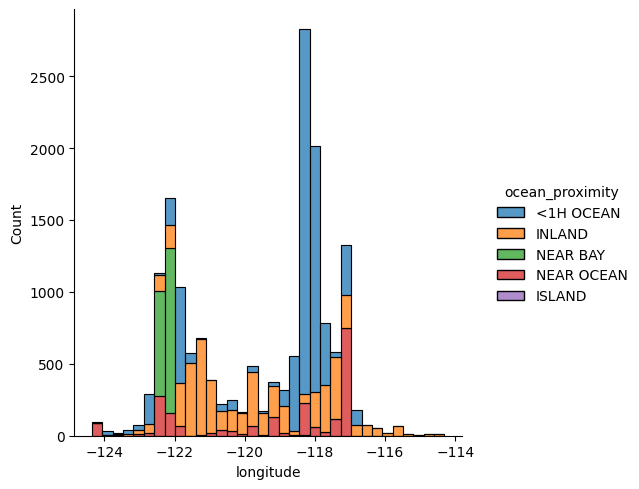

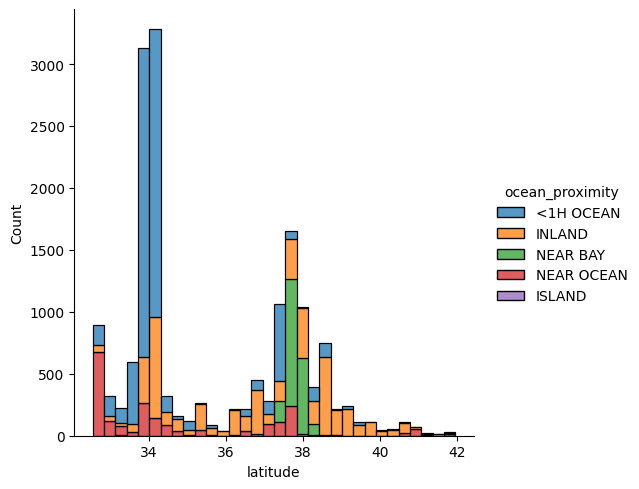

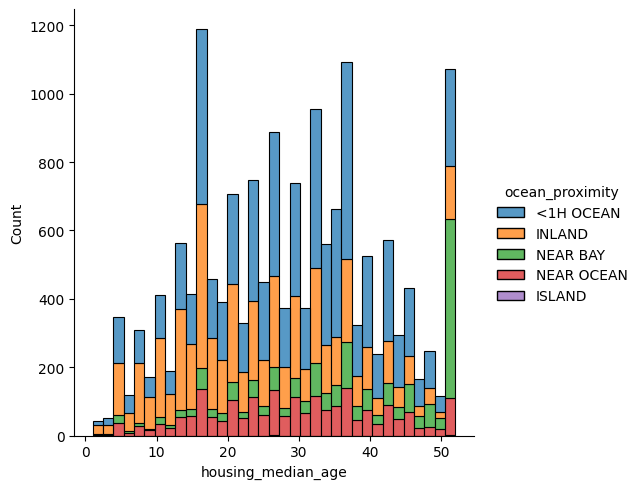

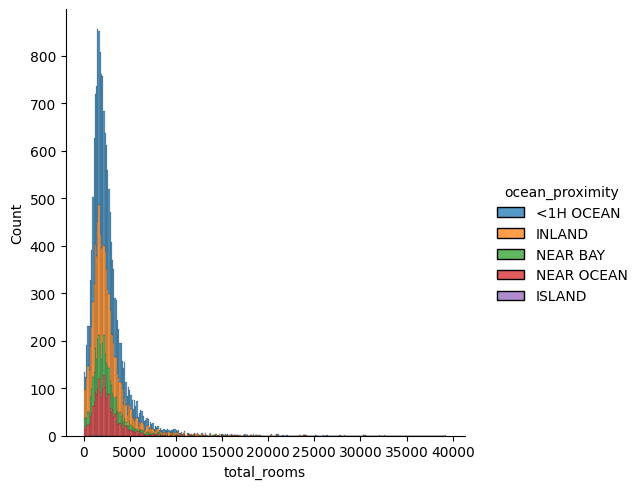

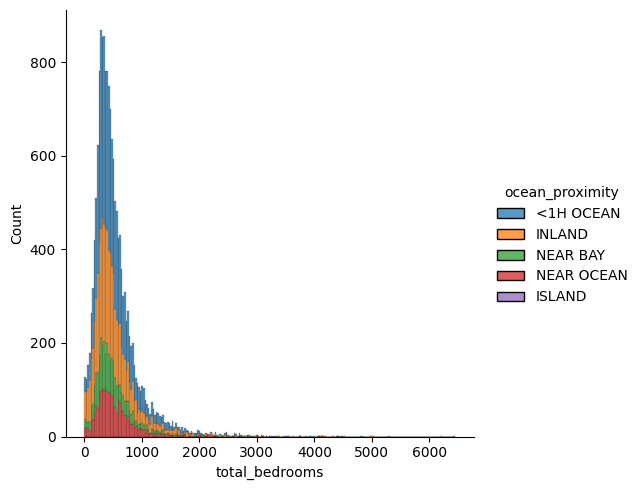

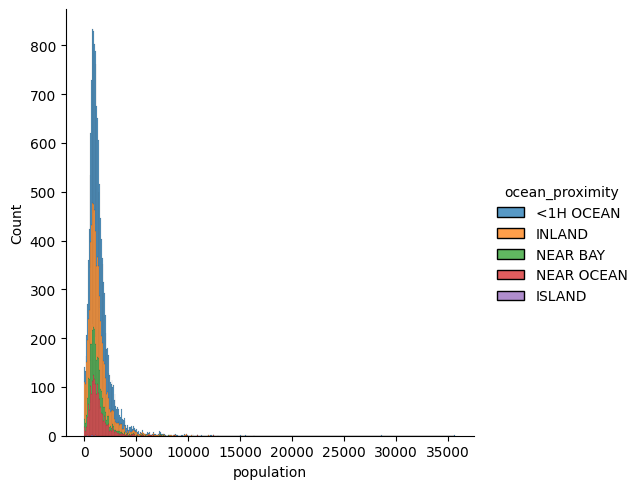

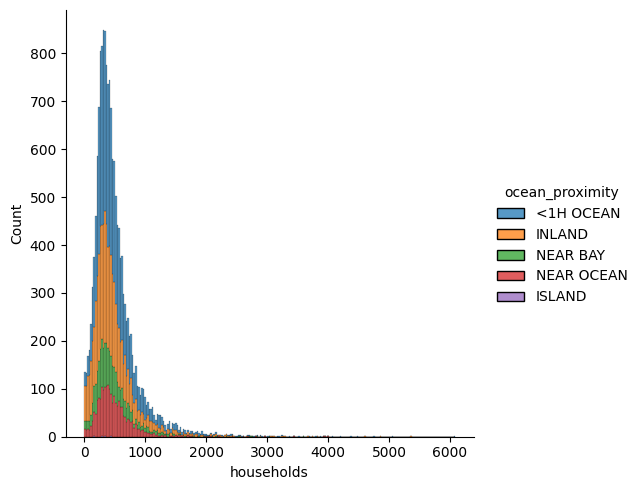

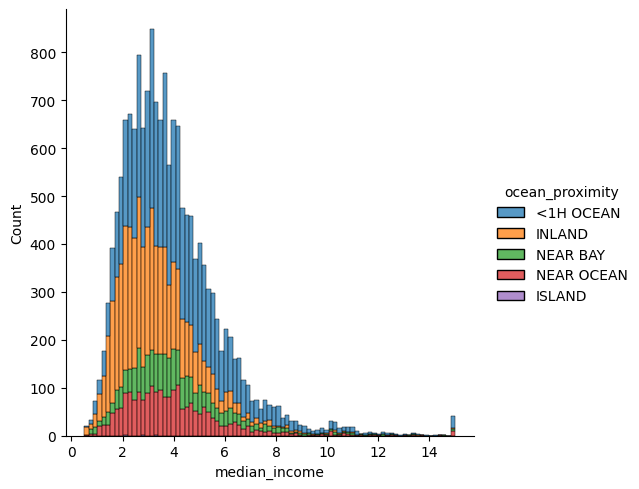

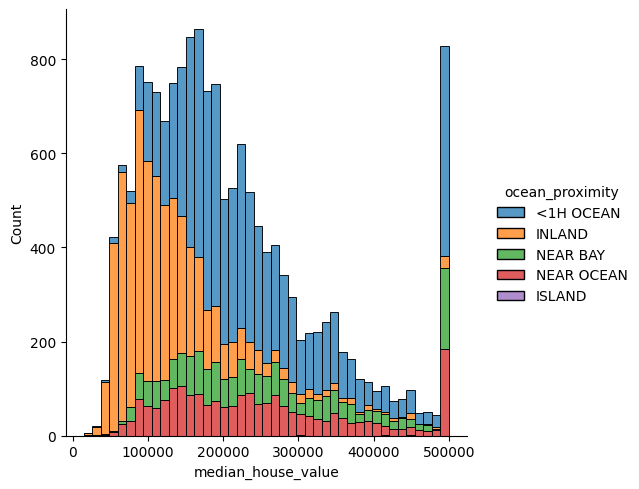

In [40]:
### distribution plot
for col in all_numeric_col: 
    sns.displot(x=df_train_new[col], hue=df_train_new.ocean_proximity, multiple="stack")
    plt.show()

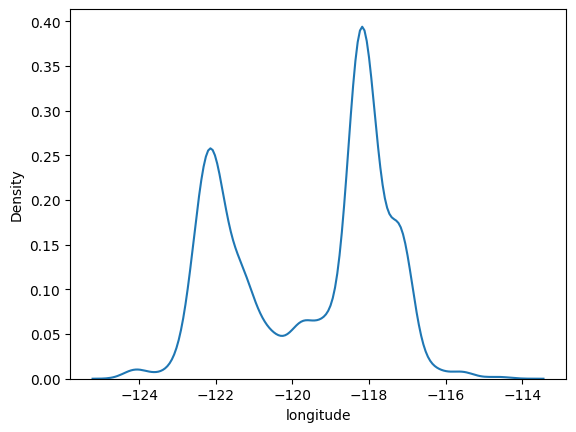

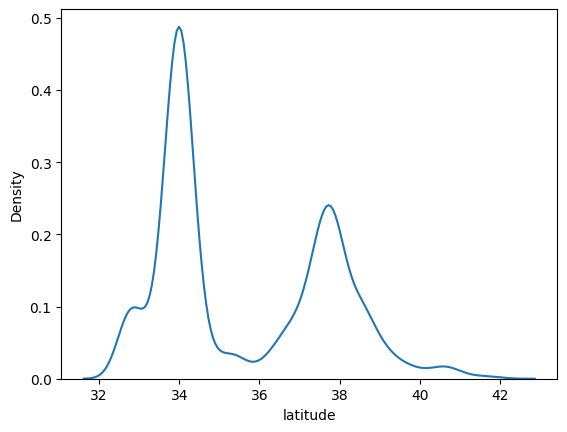

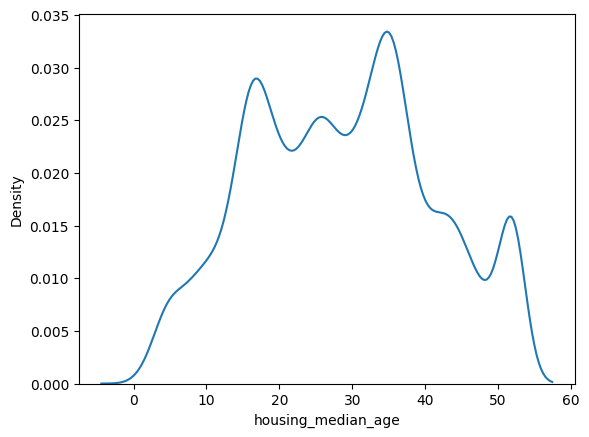

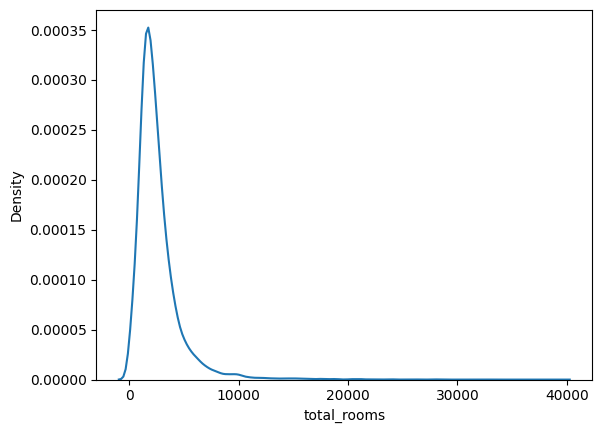

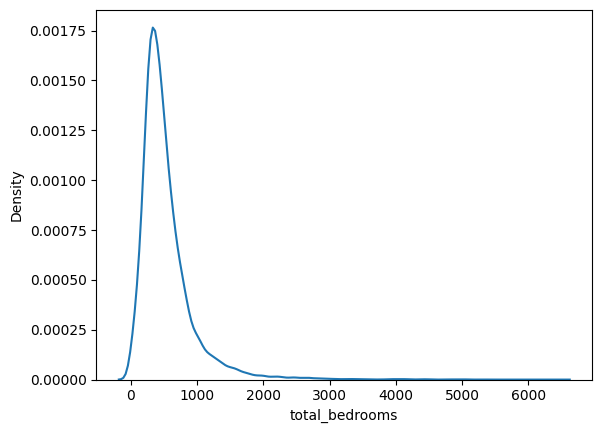

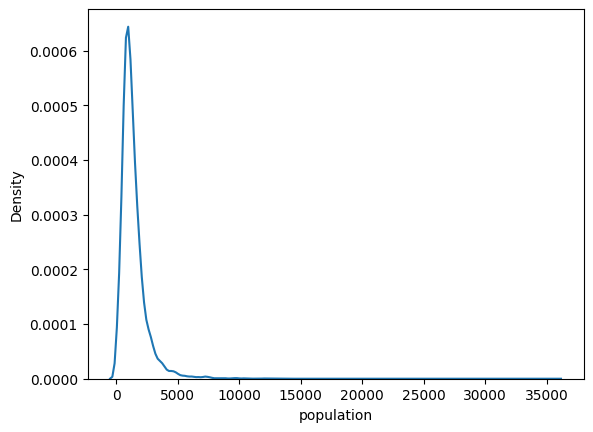

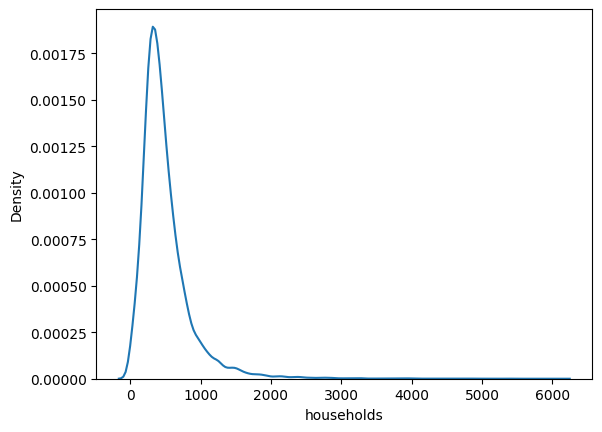

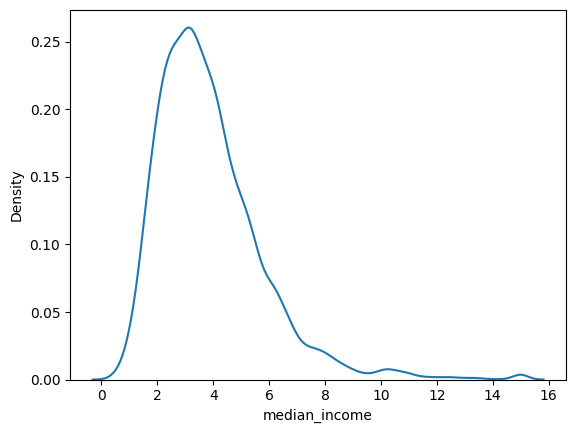

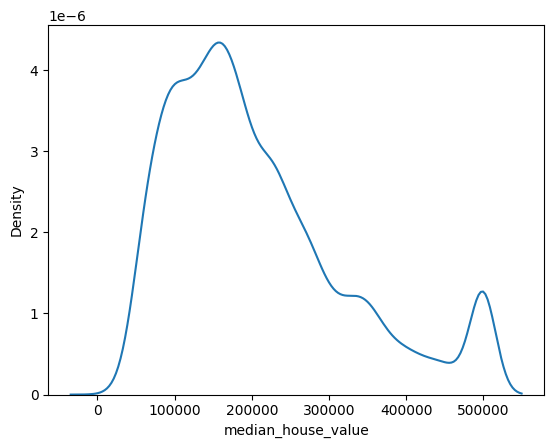

In [41]:
### distribution plot
dist_plot_folder_name=f'distplots_{time_stamp}'
dist_plot_folder_path=os.path.join(
    ROOT_DIR,
    dist_plot_folder_name
)
os.makedirs(dist_plot_folder_path,exist_ok=True)
for col in all_numeric_col: 
    sns.kdeplot(x=df_train_new[col])
    file_path=os.path.join(
        dist_plot_folder_path,
        f'{col}_distplots_plot.png'
    )
    plt.savefig(file_path)
    plt.show()
    print('==='*10)

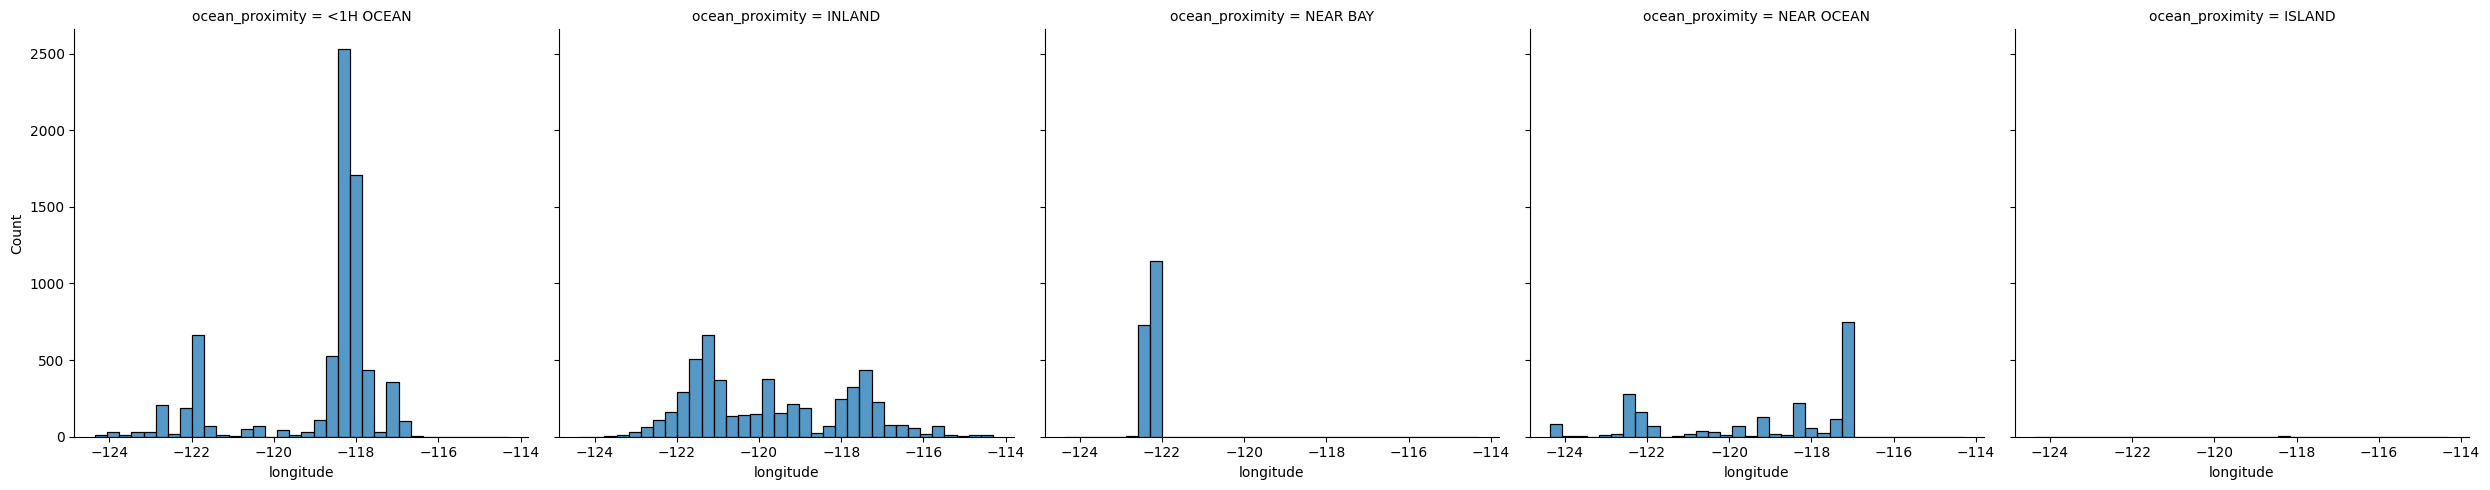

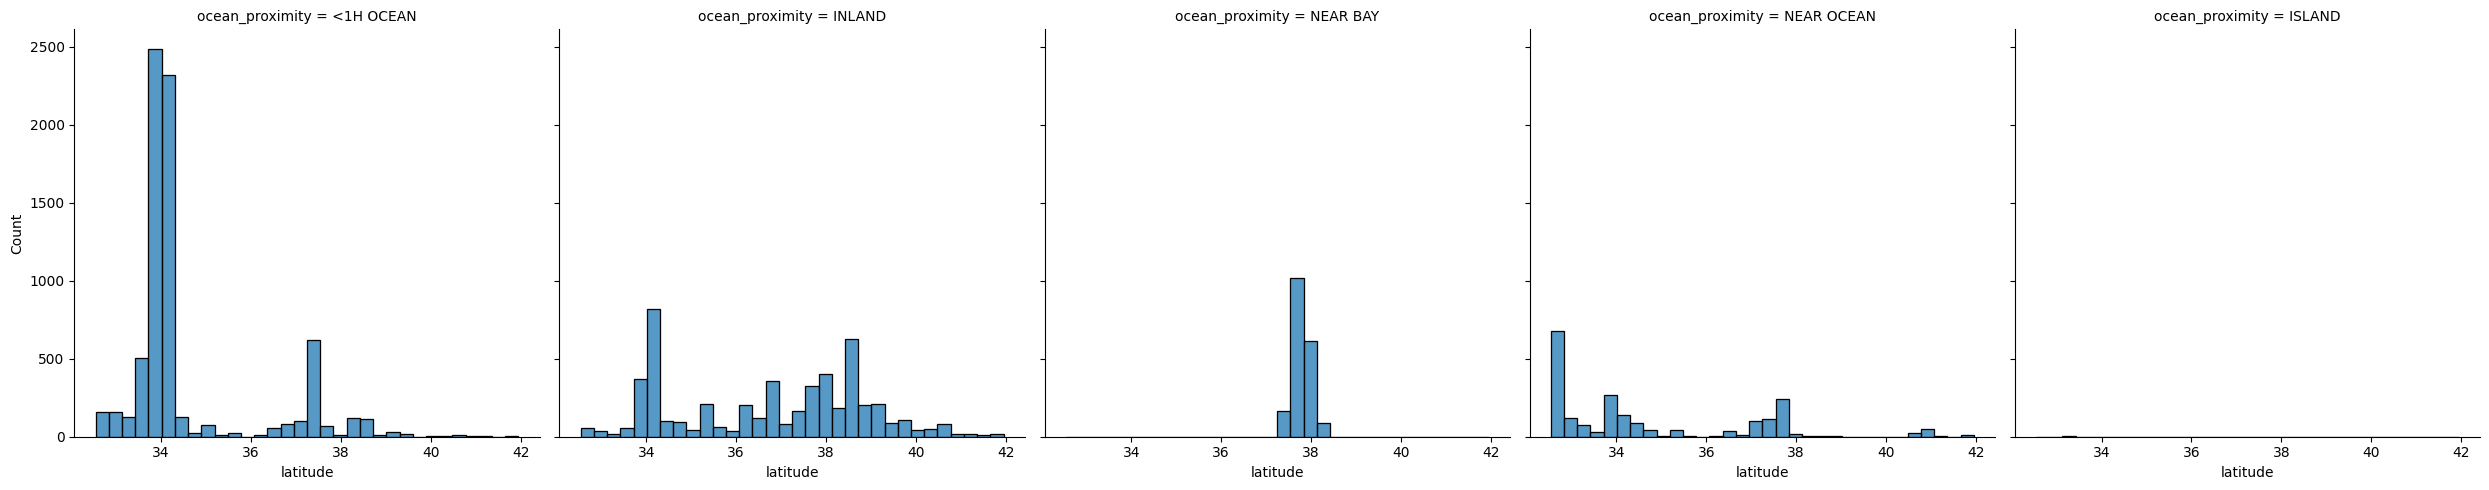

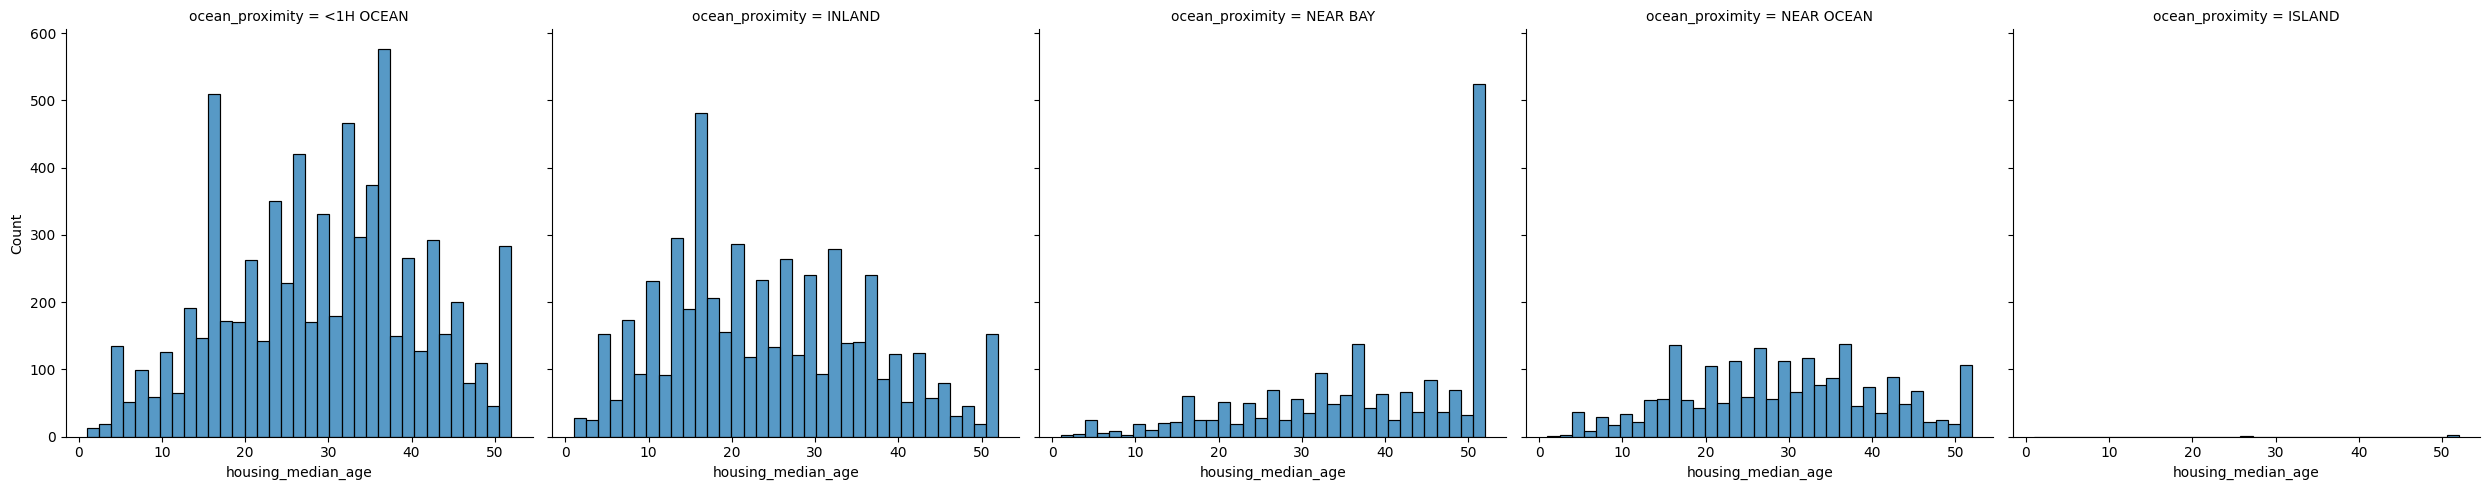

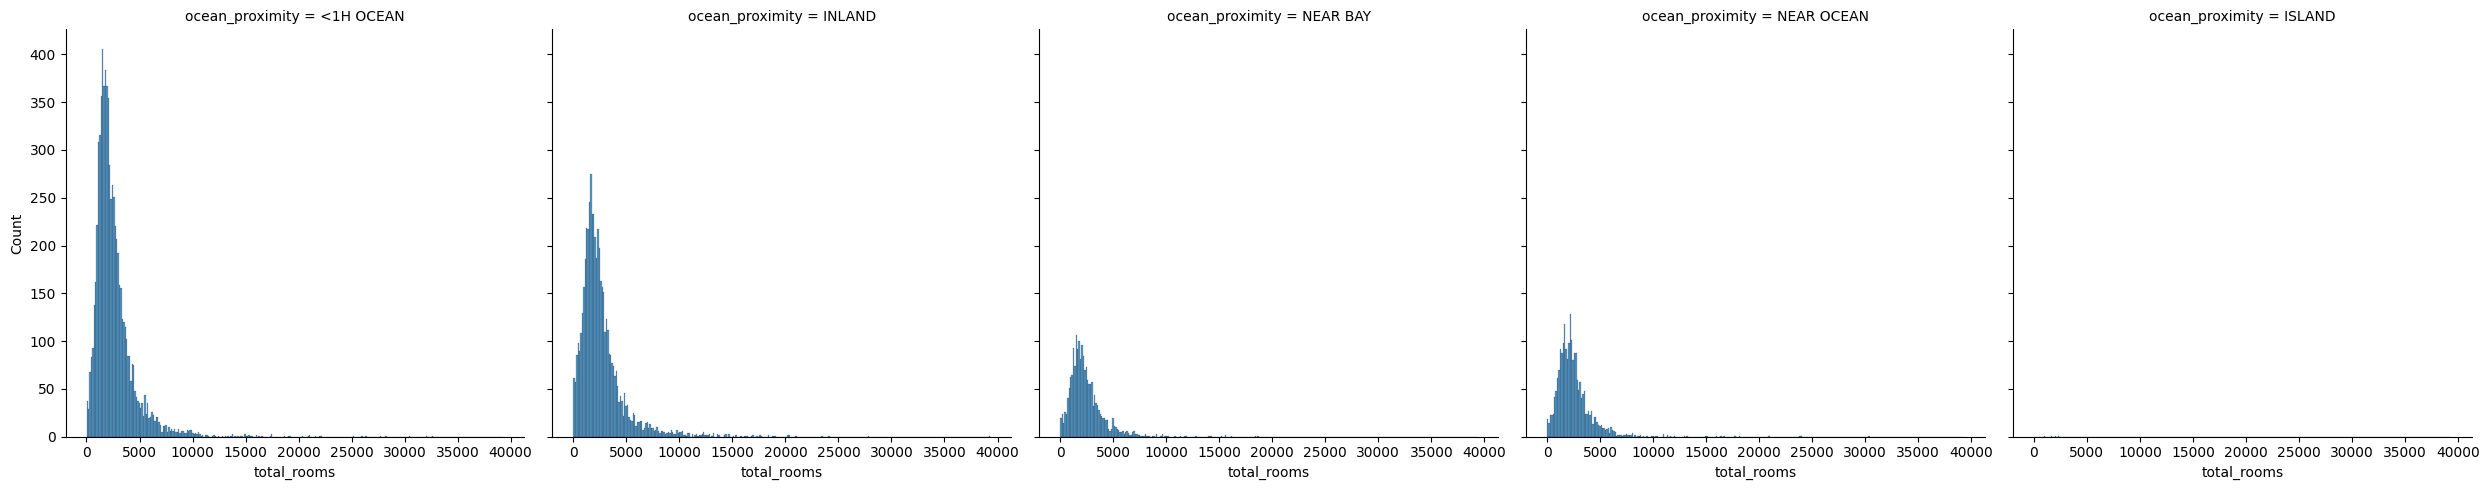

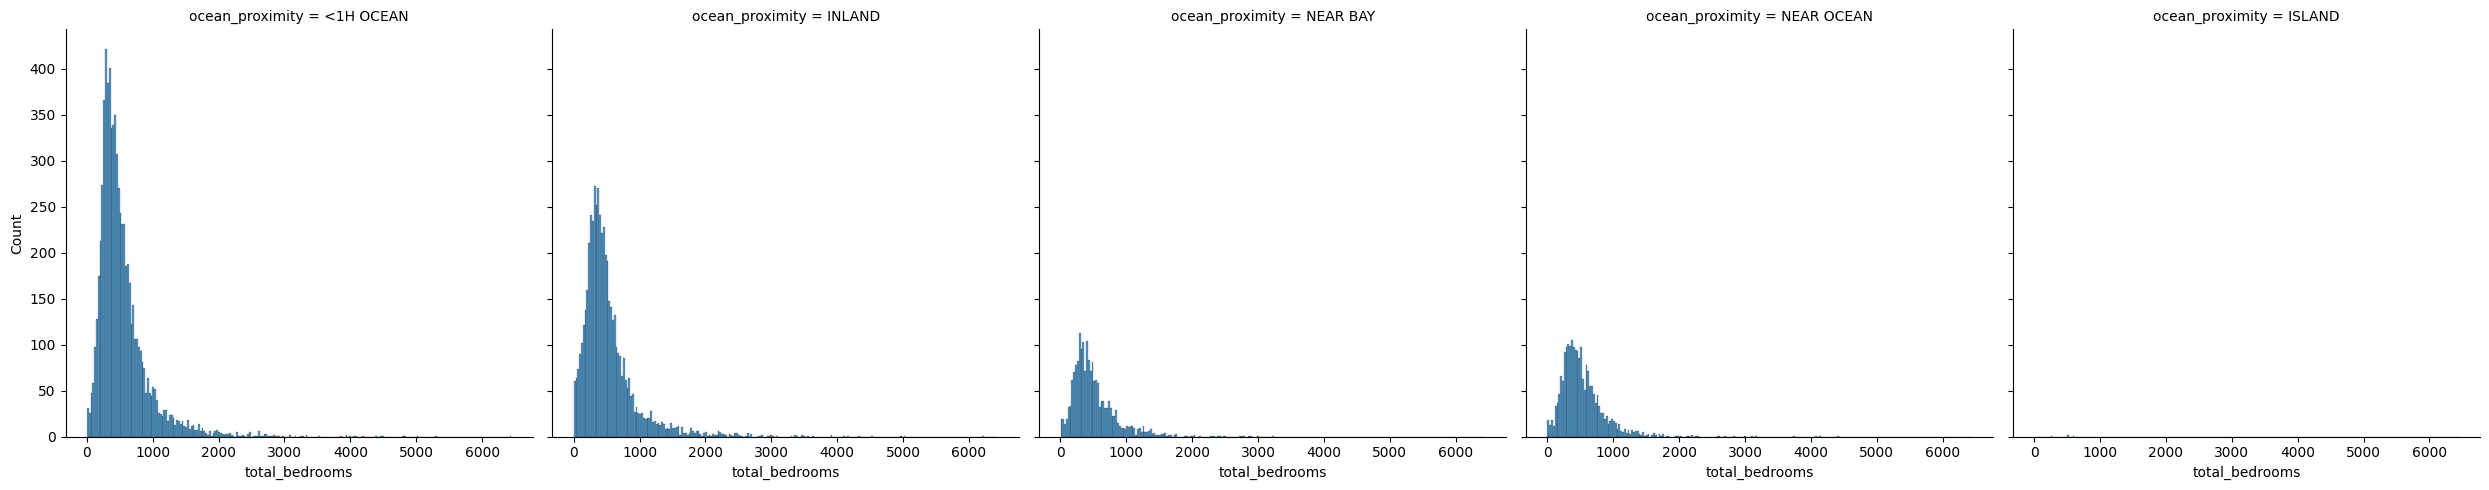

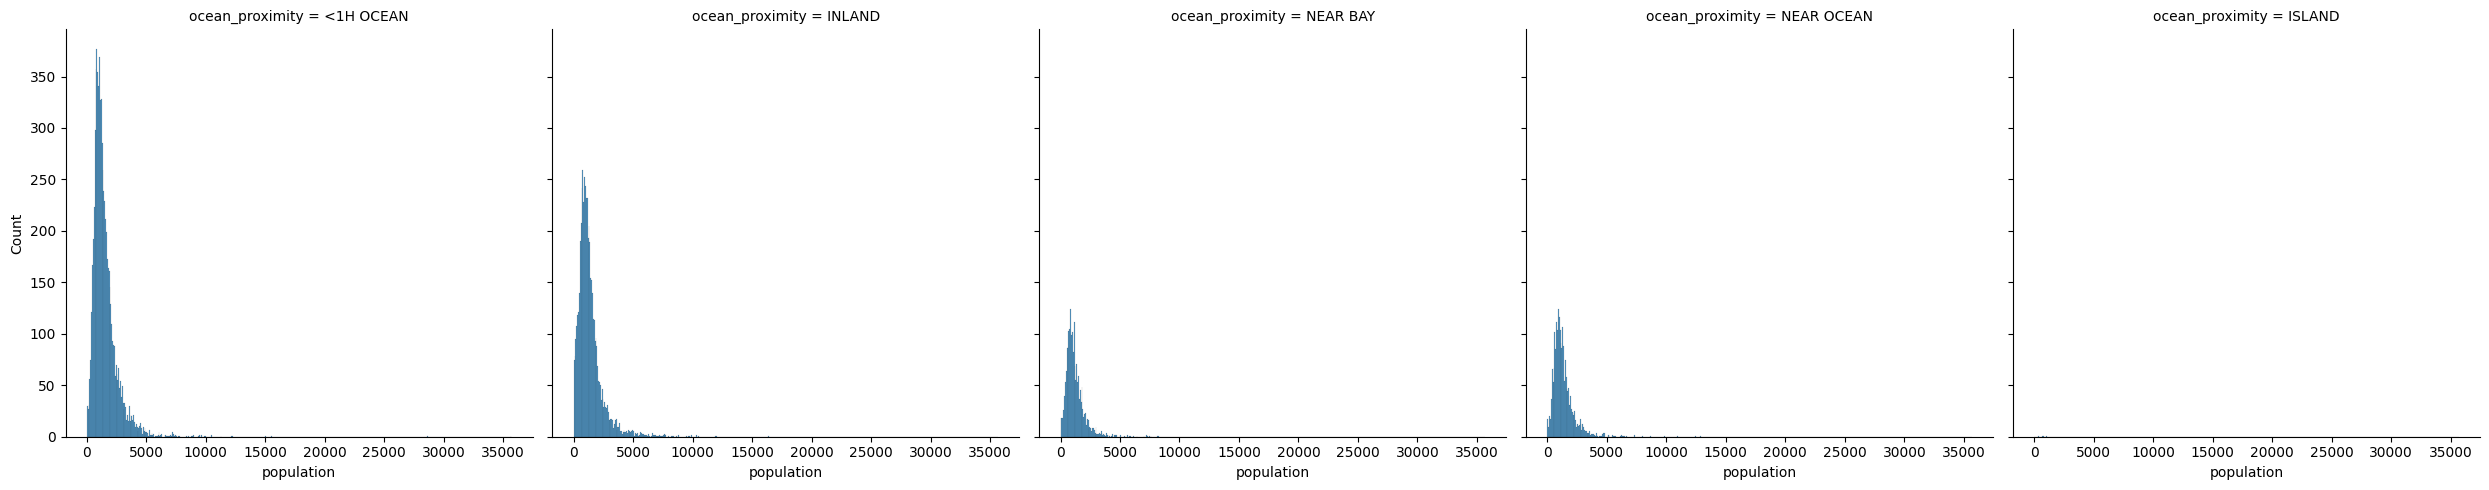

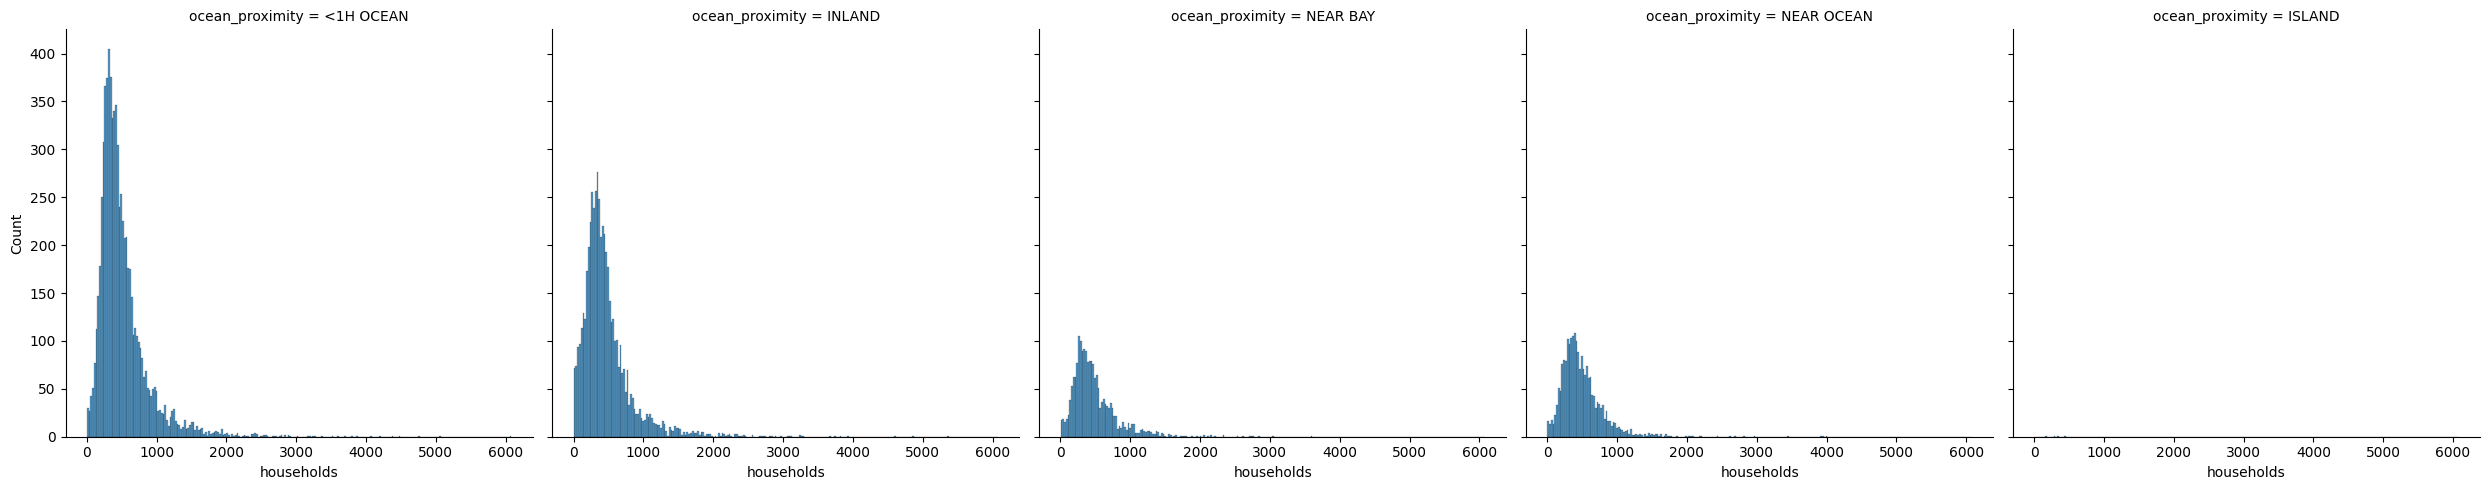

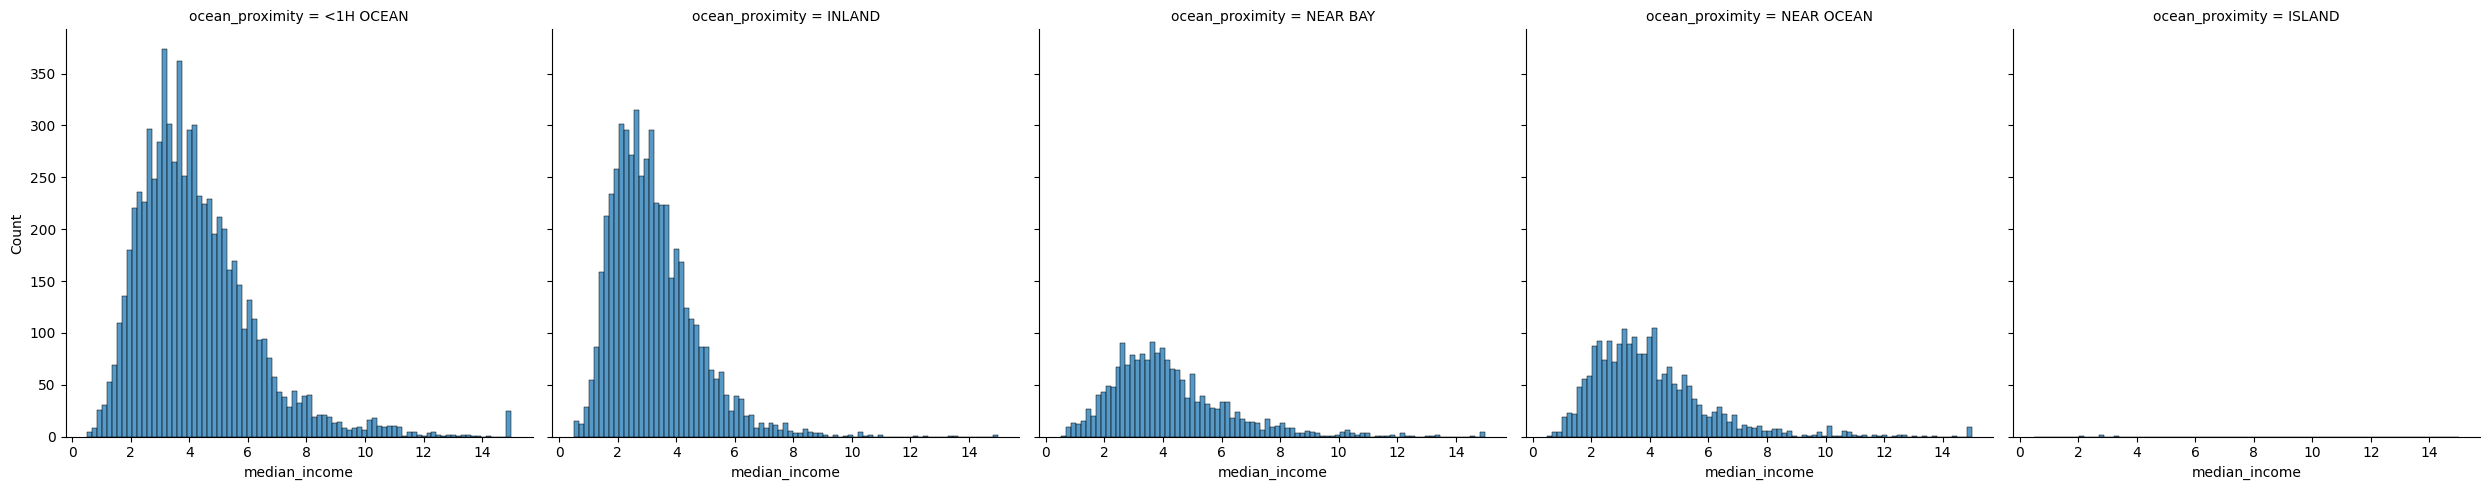

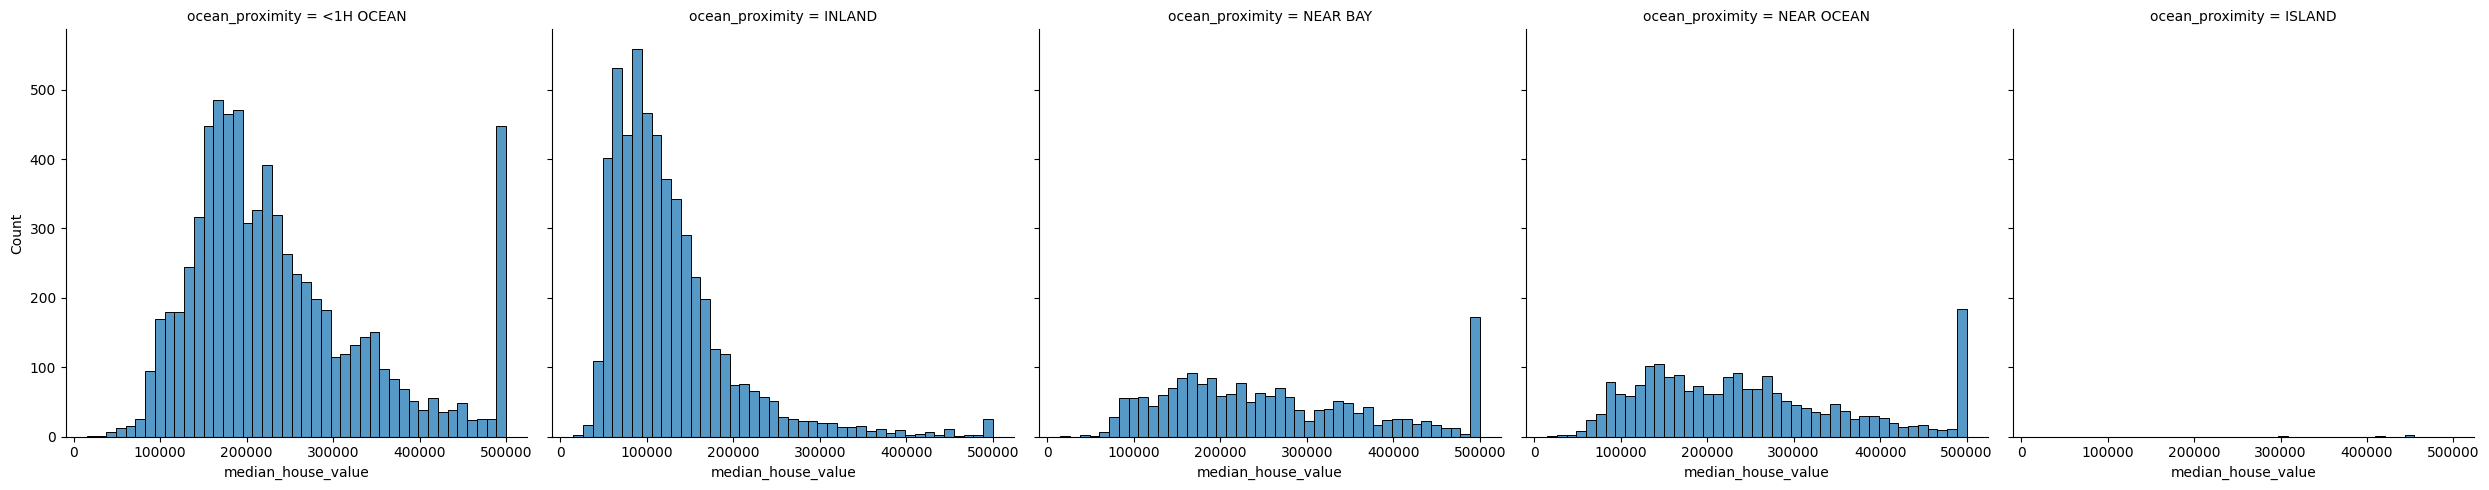

In [42]:
for col in all_numeric_col:
  file_path=os.path.join(
      dist_plot_folder_path,
      f'distplot_{col}_vs_ocean_proximity'
  )
  sns.displot(df_train_new, x=col, col='ocean_proximity')
  plt.savefig(file_path)
  plt.show()
  print('====='*15)

## conclusions

1.housing_median_age feature's all ocean_proximity unique almost normal distribution except NEAR BAY uniques

2.housing_median_age present very less ISLAND data 

3.population,total_bedrooms,total_rooms feature's all ocean_proximity unique
was log distribution



In [43]:
## find the corr usmg pandas
df_train_new.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924813           -0.112181     0.041595   
latitude            -0.924813  1.000000            0.015885    -0.034782   
housing_median_age  -0.112181  0.015885            1.000000    -0.361966   
total_rooms          0.041595 -0.034782           -0.361966     1.000000   
total_bedrooms       0.066195 -0.064836           -0.322119     0.931512   
population           0.095999 -0.107615           -0.294555     0.855382   
households           0.051299 -0.068920           -0.303605     0.918283   
median_income       -0.017589 -0.077980           -0.121615     0.198879   
median_house_value  -0.047002 -0.142754            0.105336     0.133785   

                    total_bedrooms  population  households  median_income  \
longitude                 0.066195    0.095999    0.051299      -0.017589   
latitude                 -0.064836   -0.107615   -0.068920      -0.077980   
housing_median_age       -0.322119   -0.294555   -0.303605      -0.121615   
total_rooms               0.931512    0.855382    0.918283       0.198879   
total_bedrooms            1.000000    0.877311    0.978706      -0.007183   
population                0.877311    1.000000    0.907817       0.004596   
households                0.978706    0.907817    1.000000       0.013752   
median_income            -0.007183    0.004596    0.013752       1.000000   
median_house_value        0.048016   -0.025355    0.065036       0.688214   

                    median_house_value  
longitude                    -0.047002  
latitude                     -0.142754  
housing_median_age            0.105336  
total_rooms                   0.133785  
total_bedrooms                0.048016  
population                   -0.025355  
households                    0.065036  
median_income                 0.688214  
median_house_value            1.000000

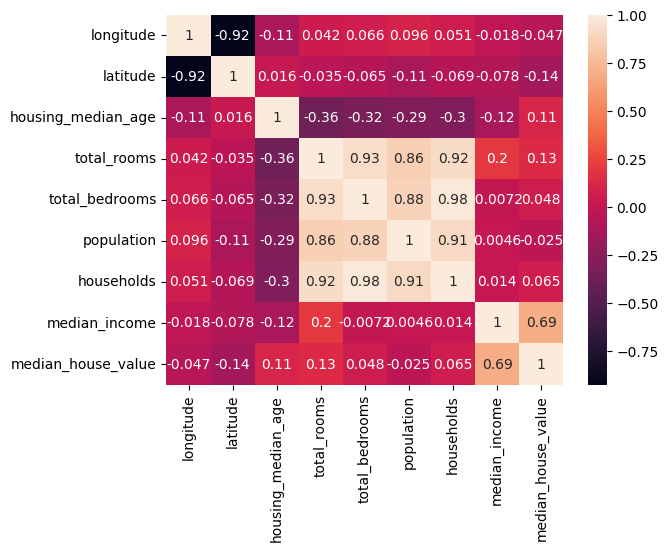

In [44]:
## visulaizing the corr using heatmap
corr_folder_name=f'corr_{time_stamp}'
corr_folder_path=os.path.join(
    ROOT_DIR,
    corr_folder_name
)
os.makedirs(corr_folder_path,exist_ok=True)
sns.heatmap(df_train_new.corr(),annot=True)
file_path=os.path.join(
 corr_folder_path,
 f'all_col_corr_plot.png'   
)
plt.savefig(file_path)

In [45]:
def check_multi_colinearity(df:pd.DataFrame,thersold:float=0.90)->dict:
    final_dic={}
    for col_1 in df:
        for col_2 in df:
            if col_1!=col_2:
                corr=df_train_new.loc[:,[col_1,col_2]].corr().iloc[0,1]
                if f'{col_1} vs {col_2}' and f'{col_2} vs {col_1}' not in final_dic:
                    final_dic.update({ f'{col_1} vs {col_2}':corr }) if corr>thersold else ''
    return final_dic

In [46]:
### most corr independent features
all_multi_colin_features_dic=check_multi_colinearity(df_train_new.iloc[:,:-2])

In [47]:
### to update final_report_dic
final_report_dic.update({"all_multi_colinearity_features_dict":all_multi_colin_features_dic})

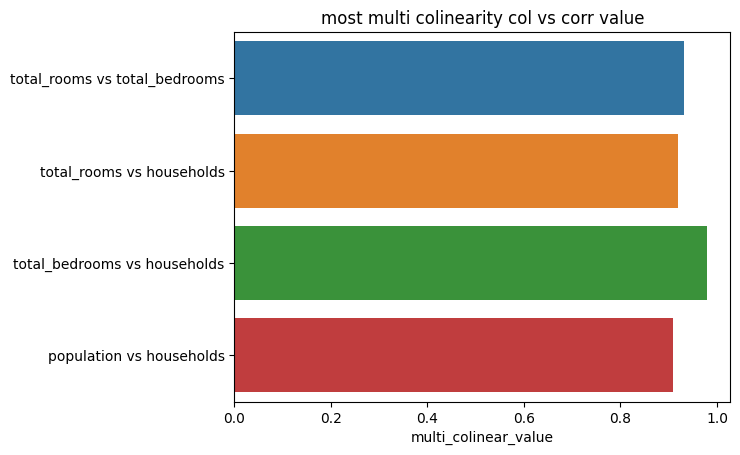

In [48]:
## plot the multi colinearity features
plt.title(f'most multi colinearity col vs corr value')
plt.xlabel('multi_colinear_value')
file_path=os.path.join(
    bar_plot_folder_path,
    f'most_multi_colinearity_col_vs_corr_value.png'
)
sns.barplot(y=list(all_multi_colin_features_dic.keys()), x=list(all_multi_colin_features_dic.values()),orient='horizontal')
plt.savefig(file_path)

In [49]:
# to find the  positive corr all  columns vs output col
all_positive_corr_col_dic={}
[all_positive_corr_col_dic.update( {col:df_train_new[[col,target_col_name]].corr().iloc[0,1]} ) \
                       for col in df_train_new.columns[:-2] if df_train_new[[col,target_col_name]].corr().iloc[0,1]>0]

[None, None, None, None, None]

In [50]:
### to update final_report_dic 
final_report_dic.update({"all_positive_corr_col_dic":all_positive_corr_col_dic})

<AxesSubplot:title={'center':'median_house_value vs all-columns-corr(positive)'}>

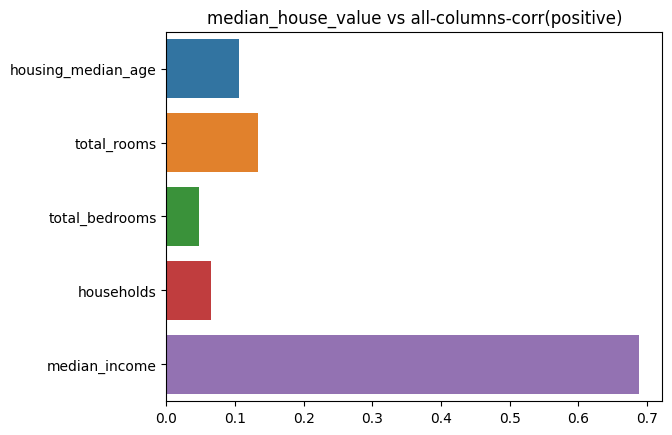

In [51]:
## to plot the all positive col corr
plt.title(f'{target_col_name} vs all-columns-corr(positive)')
file_path=os.path.join(
    bar_plot_folder_path,
    f'{target_col_name} vs all-columns-corr(positive)_plot.png'
)
sns.barplot(y=list(all_positive_corr_col_dic.keys()), x=list(all_positive_corr_col_dic.values()),orient='horizontal')

<AxesSubplot:title={'center':'median_house_value vs all-columns-corr(negative)'}>

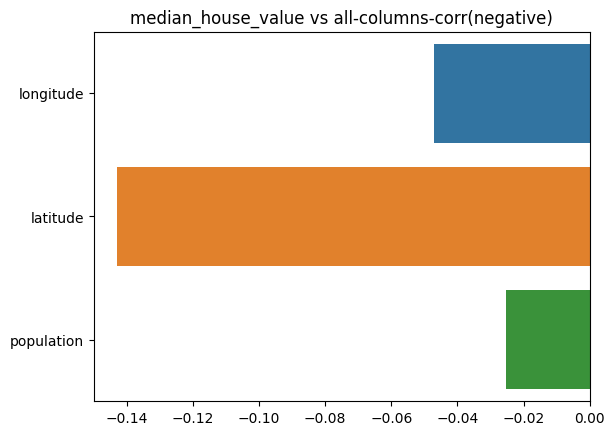

In [52]:
# to find the  corr all  columns vs output col
all_negative_corr_col_dic={}
all_positive_corr_col=[all_negative_corr_col_dic.update( {col:df_train_new[[col,target_col_name]].corr().iloc[0,1]} ) \
                       for col in df_train_new.columns[:-2] if df_train_new[[col,target_col_name]].corr().iloc[0,1]<0]


###  to update final_report_dic
final_report_dic.update({ "all_negative_corr_col_dic":all_negative_corr_col_dic })


## to plot the all positive col corr
plt.title(f'{target_col_name} vs all-columns-corr(negative)')
file_path=os.path.join(
    bar_plot_folder_path,
    f'{target_col_name} vs all-columns-corr(negative)_plot.png'
)
sns.barplot(y=list(all_negative_corr_col_dic.keys()), x=list(all_negative_corr_col_dic.values()),orient='horizontal')

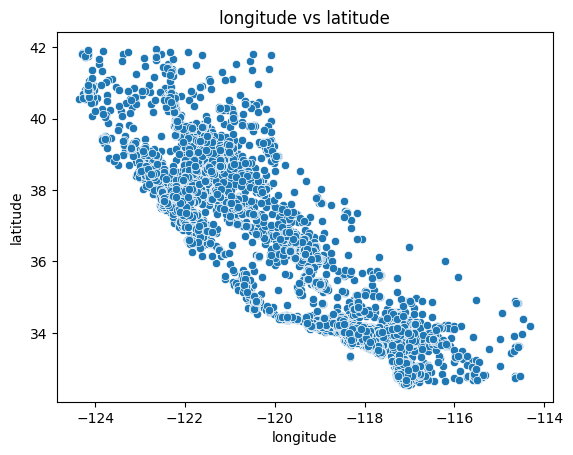

------------------------------------------------------------


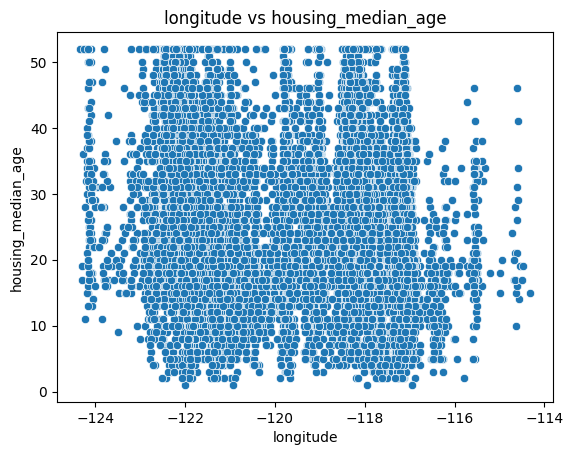

------------------------------------------------------------


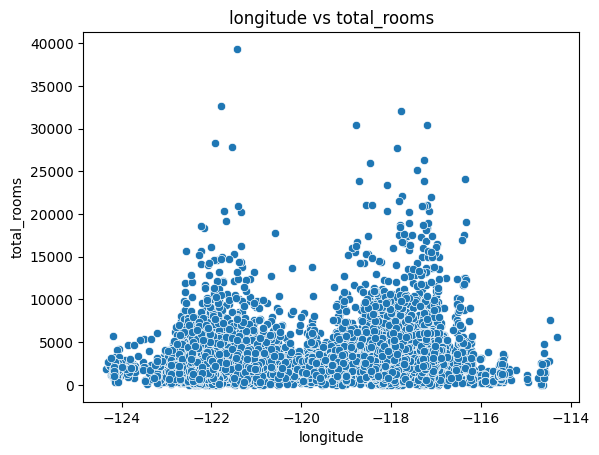

------------------------------------------------------------


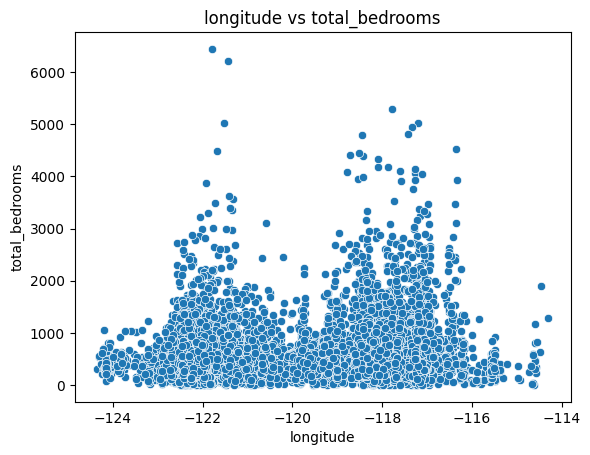

------------------------------------------------------------


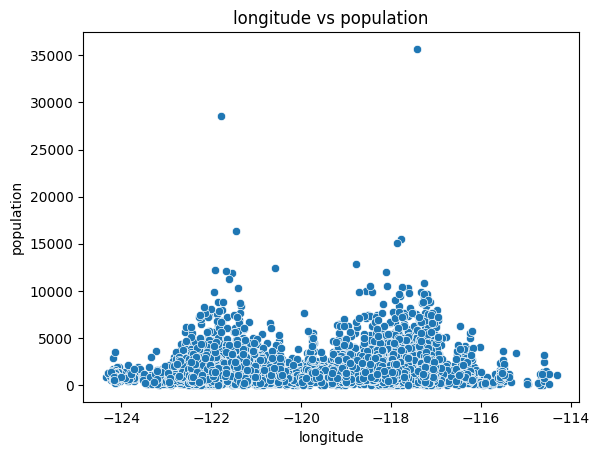

------------------------------------------------------------


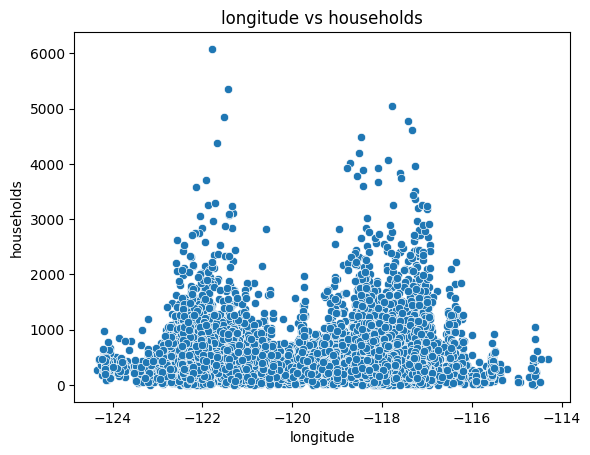

------------------------------------------------------------


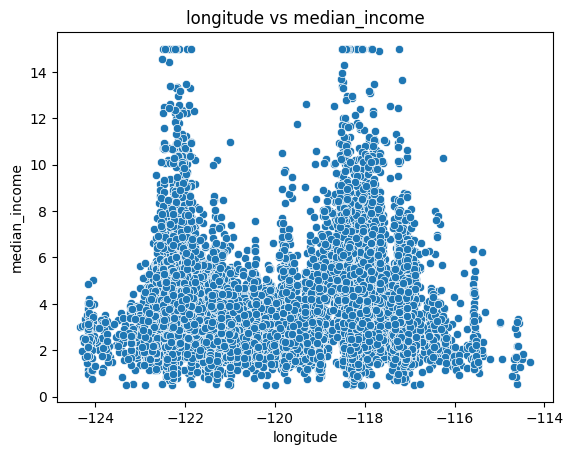

------------------------------------------------------------


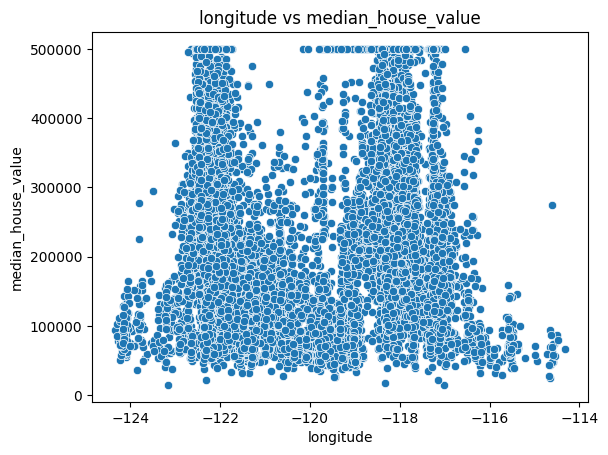

------------------------------------------------------------


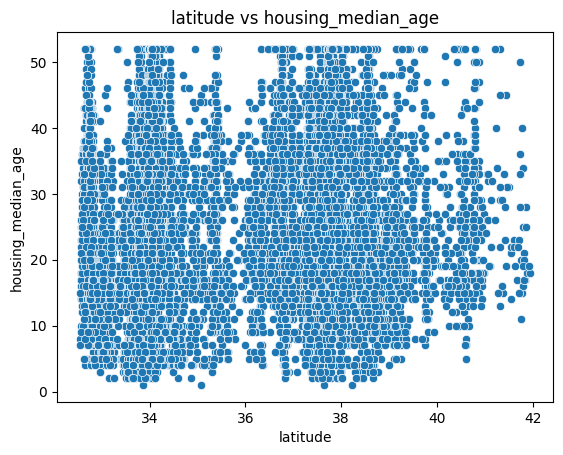

------------------------------------------------------------


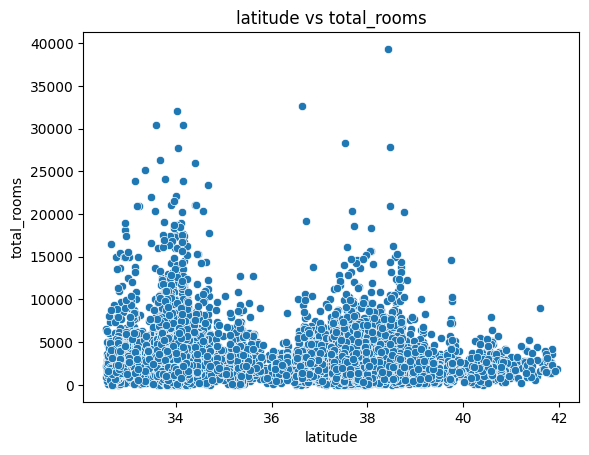

------------------------------------------------------------


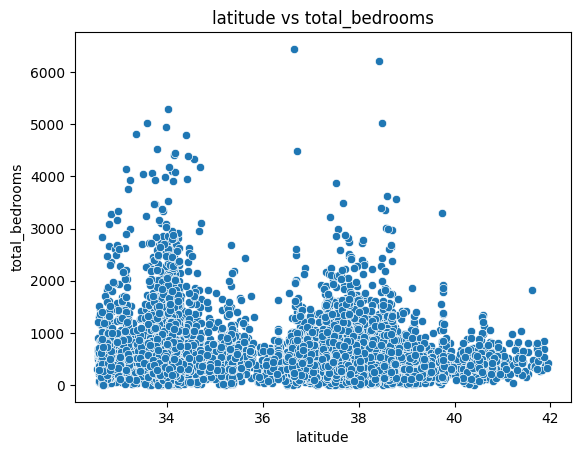

------------------------------------------------------------


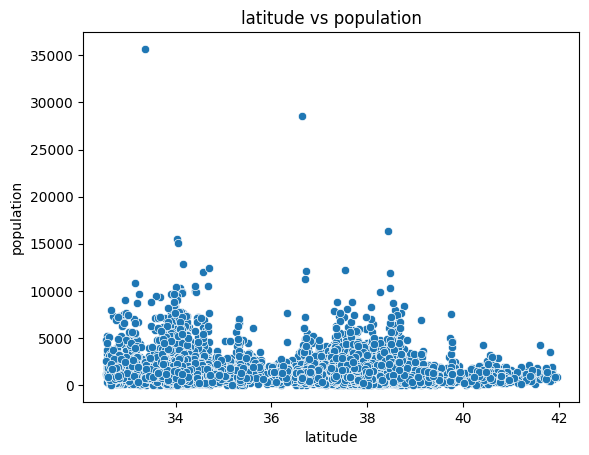

------------------------------------------------------------


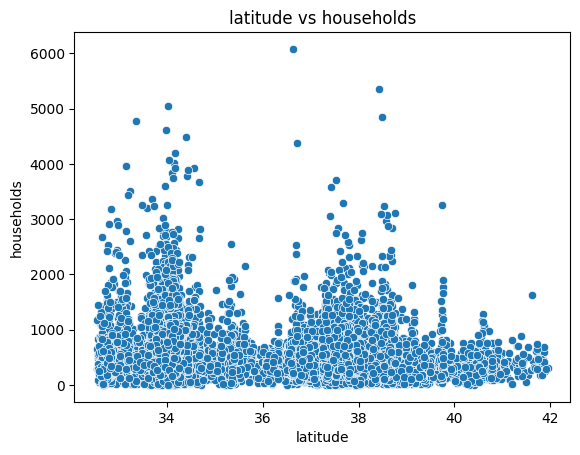

------------------------------------------------------------


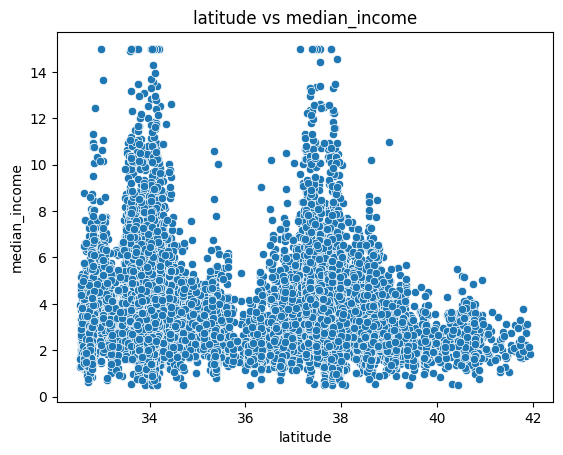

------------------------------------------------------------


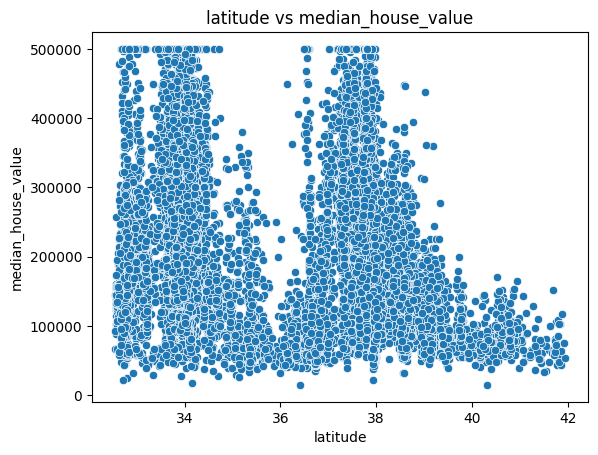

------------------------------------------------------------


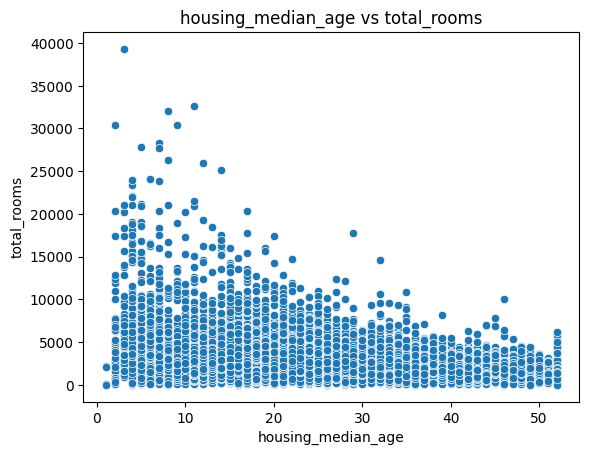

------------------------------------------------------------


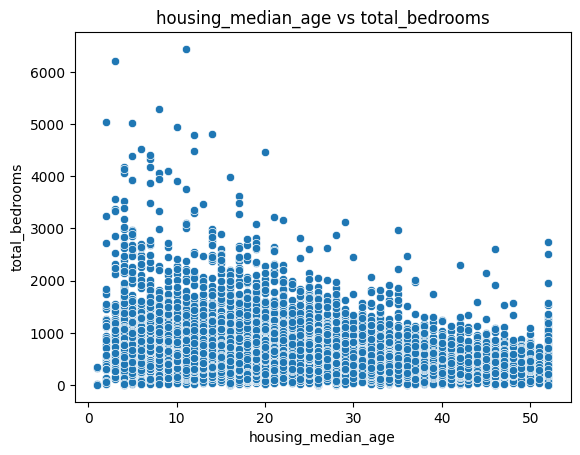

------------------------------------------------------------


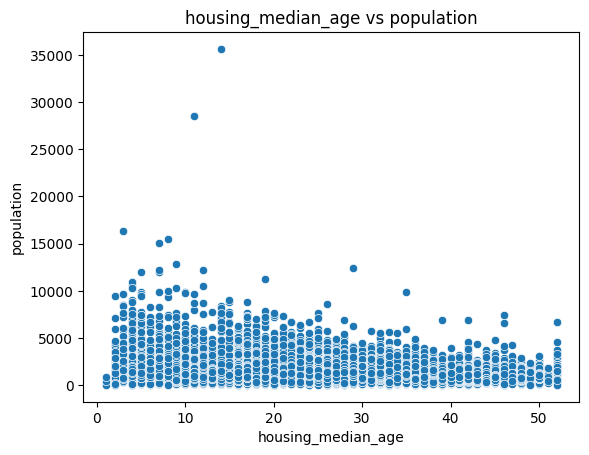

------------------------------------------------------------


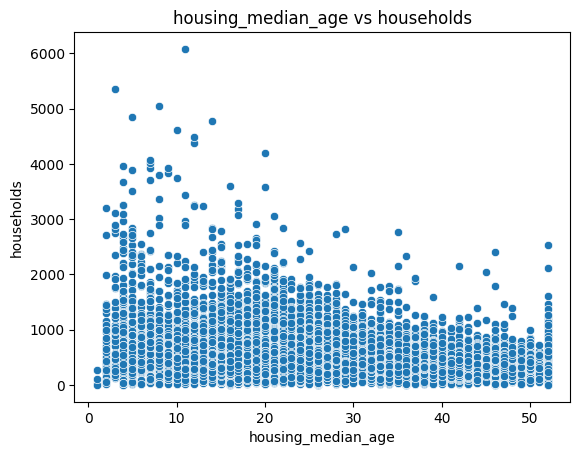

------------------------------------------------------------


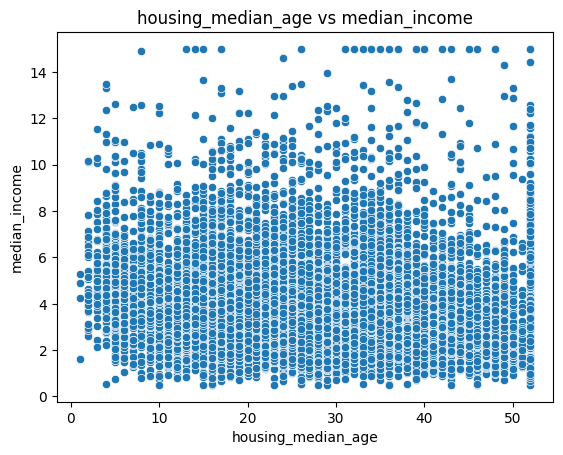

------------------------------------------------------------


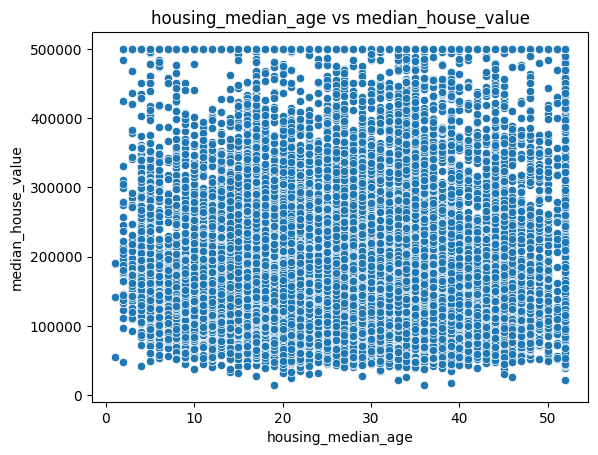

------------------------------------------------------------


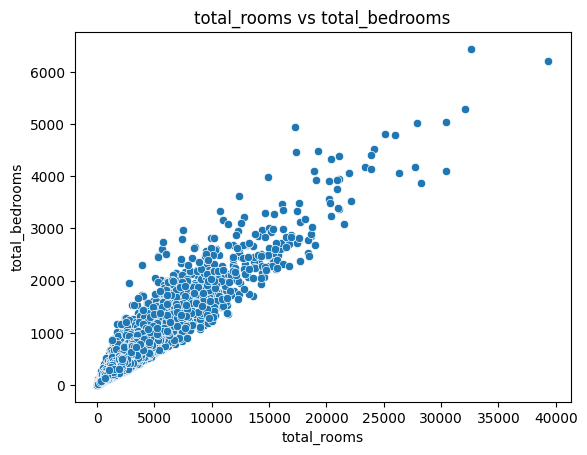

------------------------------------------------------------


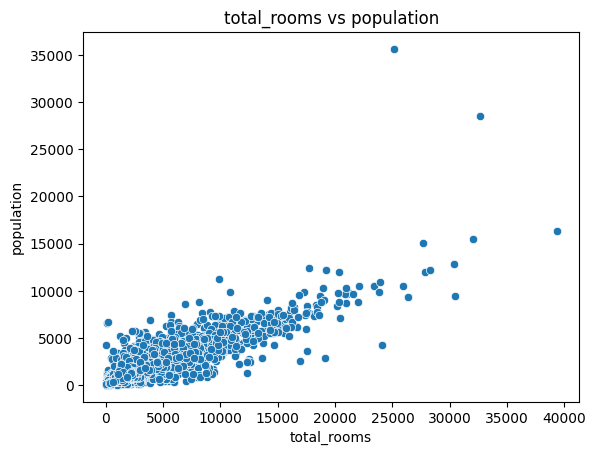

------------------------------------------------------------


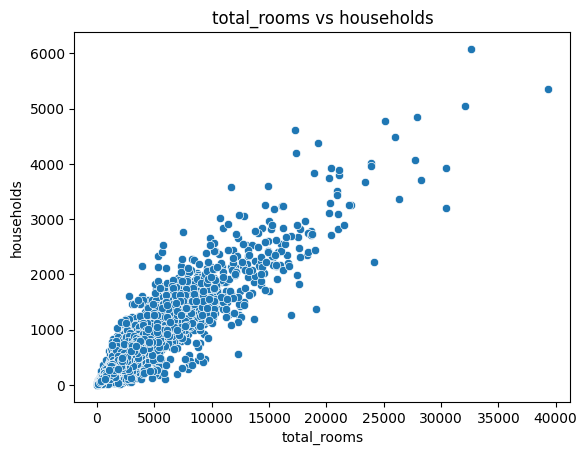

------------------------------------------------------------


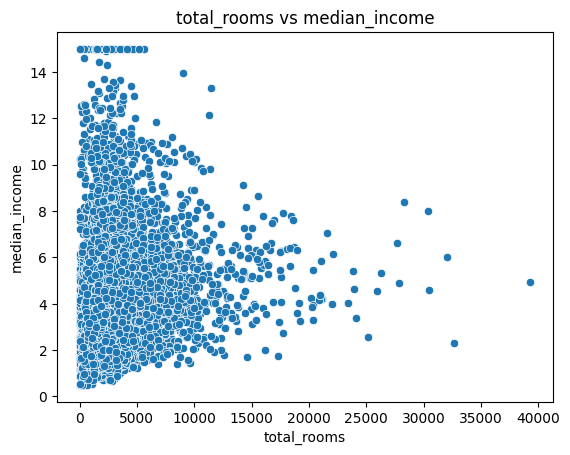

------------------------------------------------------------


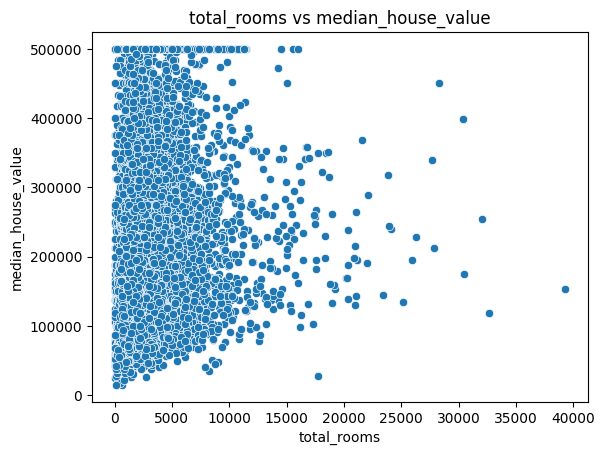

------------------------------------------------------------


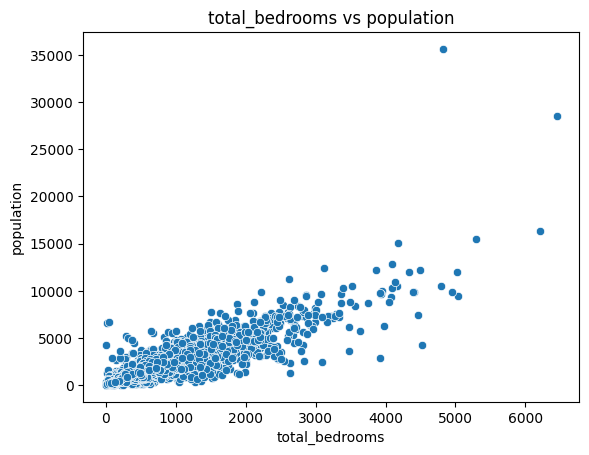

------------------------------------------------------------


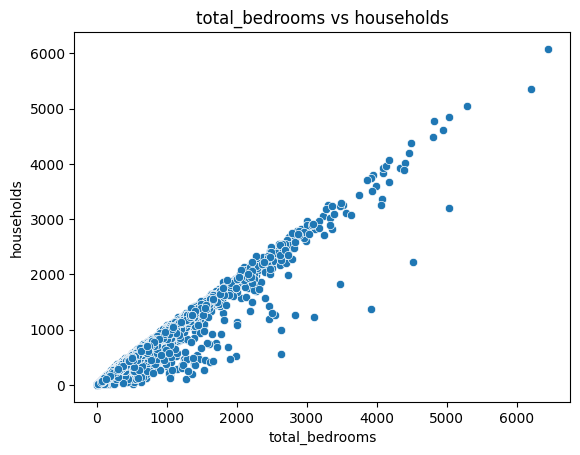

------------------------------------------------------------


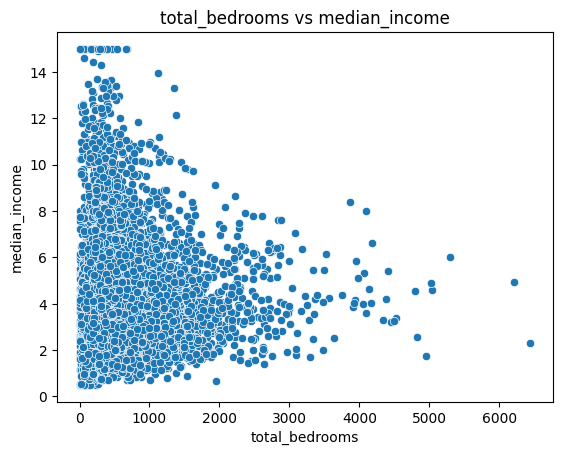

------------------------------------------------------------


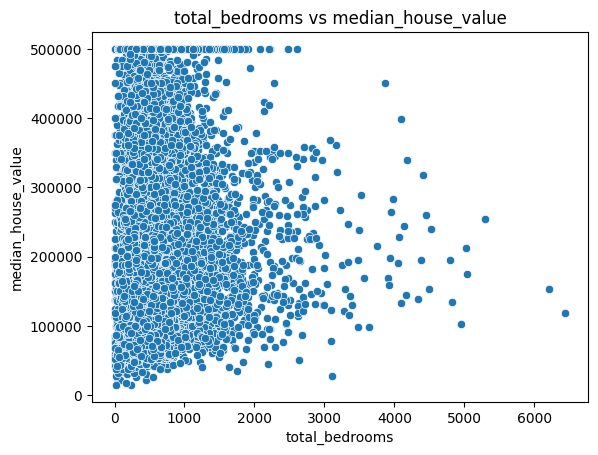

------------------------------------------------------------


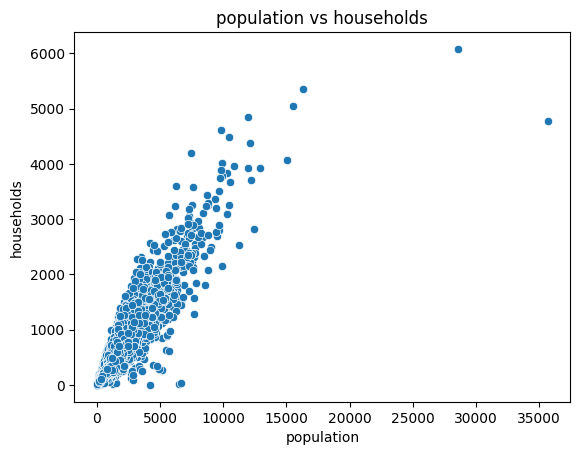

------------------------------------------------------------


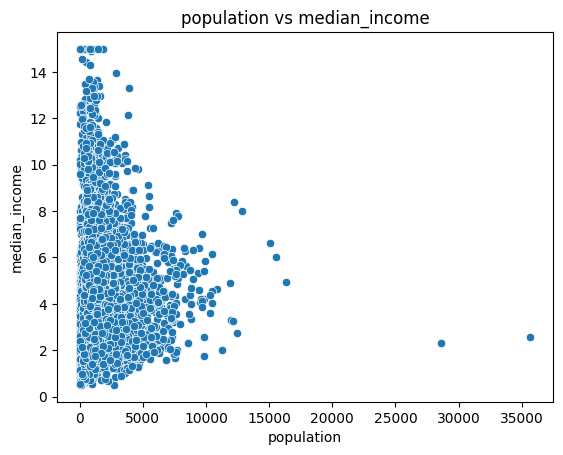

------------------------------------------------------------


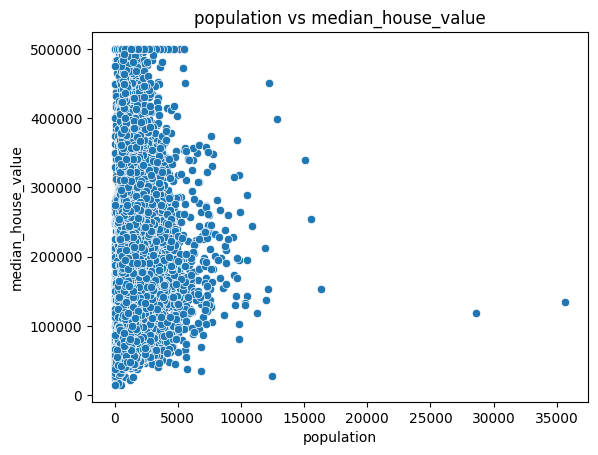

------------------------------------------------------------


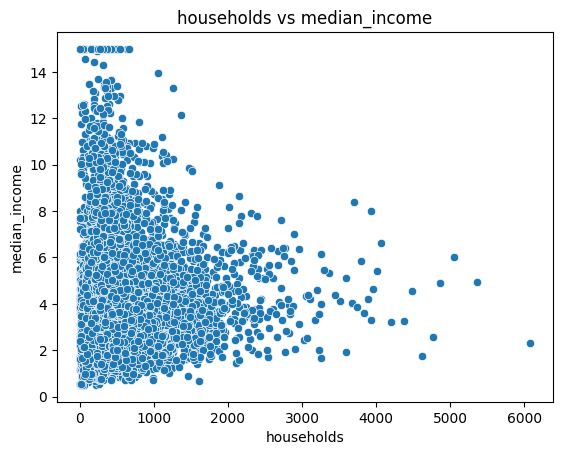

------------------------------------------------------------


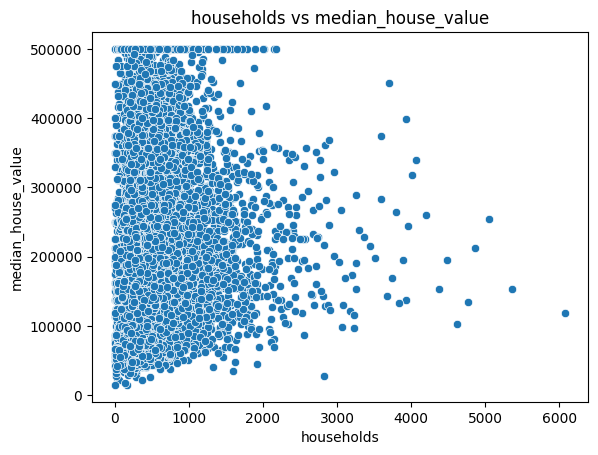

------------------------------------------------------------


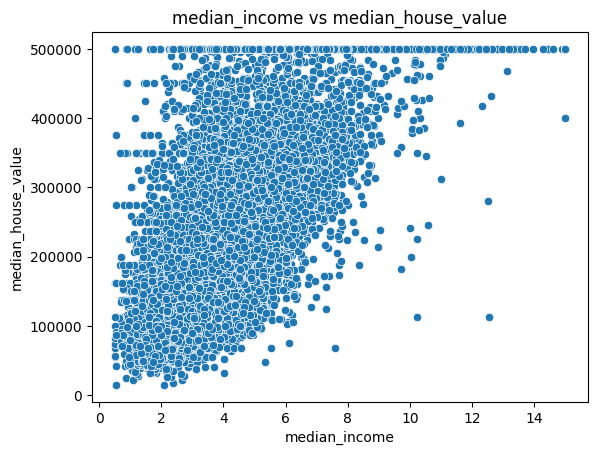

------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [53]:
### to find linear relationship using scatter plot
scatter_folder_name=f'scatterplots_{time_stamp}'
scatter_folder_path=os.path.join(
    ROOT_DIR,
    scatter_folder_name
)
os.makedirs(scatter_folder_path,exist_ok=True)
combi=combinations(all_numeric_col,2)
for col_1,col_2 in combi:
  plt.title(f'{col_1} vs {col_2}')
  sns.scatterplot(x=df_train_new[col_1],y=df_train_new[col_2])
  plt.show()
  file_path=os.path.join(
      scatter_folder_path,
      f'{col_1}_vs_{col_2}_plots.png'
  )
  plt.savefig(file_path)
  print('---'*20)


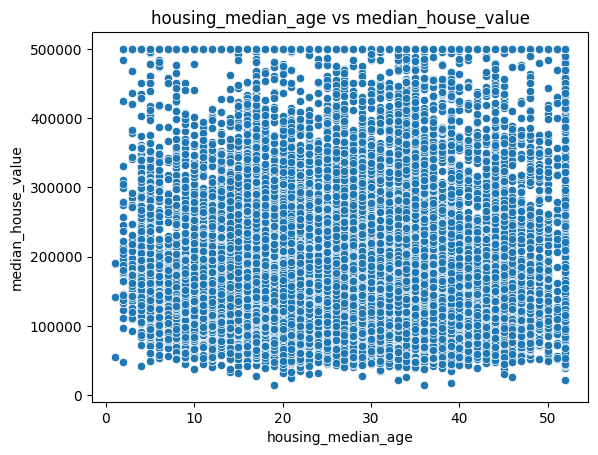

------------------------------------------------------------


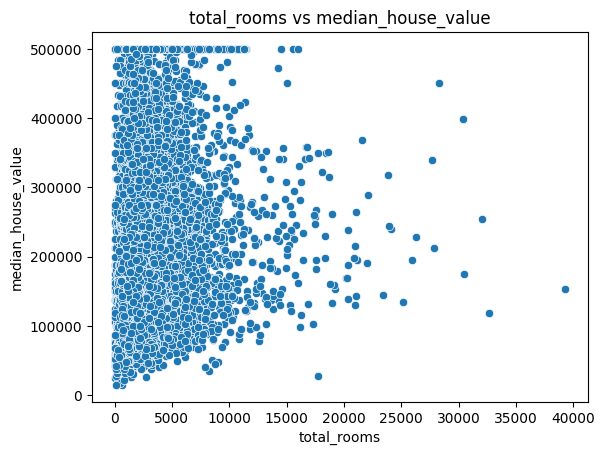

------------------------------------------------------------


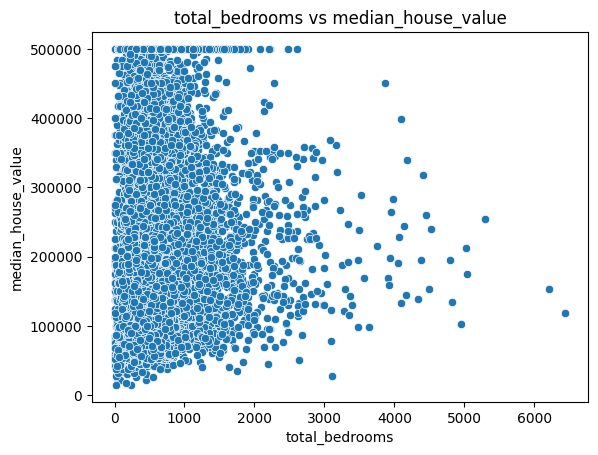

------------------------------------------------------------


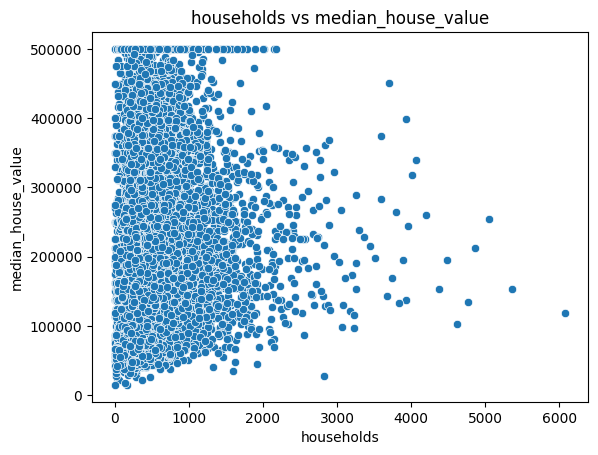

------------------------------------------------------------


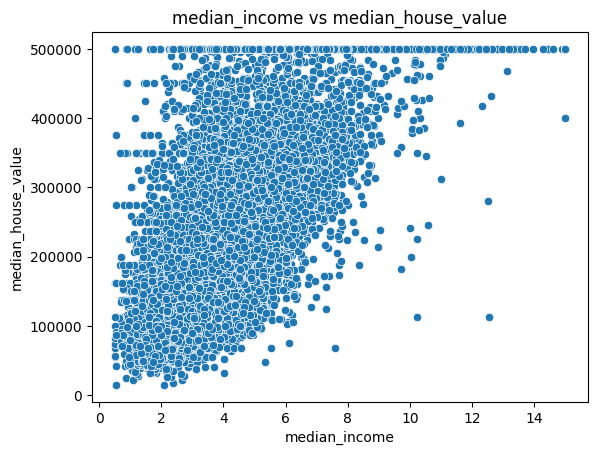

------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [54]:
### plot all positive corr col vs target col
for col_1 in all_positive_corr_col_dic.keys():
  col_2=target_col_name
  plt.title(f'{col_1} vs {col_2}')
  sns.scatterplot(x=df_train_new[col_1],y=df_train_new[col_2])
  file_path=os.path.join(
      scatter_folder_path,
      f'positive_corr_{col_1}_vs_{col_2}.png'
  )
  plt.show()
  plt.savefig(file_path)
  print('---'*20)


In [55]:
### to change the all columns dtypes float64 to float32
new_df=df_train_new.iloc[:,:-1].astype(np.float32)
new_df[df_train_new.columns[-1]]=df_train_new.iloc[:,-1]

In [56]:
df_train_new.memory_usage(deep=True)

Index                     128
longitude              132096
latitude               132096
housing_median_age     132096
total_rooms            132096
total_bedrooms         132096
population             132096
households             132096
median_income          132096
median_house_value     132096
ocean_proximity       1074325
dtype: int64

In [57]:
new_df.memory_usage(deep=True)

Index                     128
longitude               66048
latitude                66048
housing_median_age      66048
total_rooms             66048
total_bedrooms          66048
population              66048
households              66048
median_income           66048
median_house_value      66048
ocean_proximity       1074325
dtype: int64

In [58]:
final_report_dic

{'all_null_value_columns': [('total_bedrooms', 161, 0.01)],
 'number_of_unique_values': [('longitude', 819),
  ('latitude', 847),
  ('housing_median_age', 52),
  ('total_rooms', 5463),
  ('total_bedrooms', 1808),
  ('population', 3618),
  ('households', 1704),
  ('median_income', 10931),
  ('median_house_value', 3668),
  ('ocean_proximity', 5)],
 'dicreate_val_col': [('ocean_proximity', 5)],
 'un_normal_dist_col': [('longitude', -0.2898923802260981),
  ('total_rooms', 4.1434354761740595),
  ('total_bedrooms', 3.4591214775244463),
  ('population', 5.329808423092944),
  ('households', 3.409756890021786),
  ('median_income', 1.634338583658539)],
 'all_numeric_col': ['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'median_house_value'],
 'all_outlier_col_dic': {'longitude': [],
  'latitude': [],
  'housing_median_age': [],
  'total_rooms': [3,
   9,
   11,
   22,
   27,
   32,
   33,
   34,
   36,


In [59]:
pip install numpyencoder

Note: you may need to restart the kernel to use updated packages.


In [60]:
## to convert dict to json report 
import json
from numpyencoder import NumpyEncoder
with open(json_file_path,'w') as json_file:
  json.dump(final_report_dic,json_file,
            cls=NumpyEncoder)

In [61]:
# !pip install numpyencoder

In [62]:

with open('final_report.json','r') as json_file:
  json_content=json.load(json_file)

In [64]:
json_content_keys

dict_keys(['all_null_value_columns', 'number_of_unique_values', 'dicreate_val_col', 'un_normal_dist_col', 'all_numeric_col', 'all_outlier_col_dic', 'all_oulier_using_std', 'all_cat_columns', 'all_dicreate_col_nunique', 'all_median_val_named_tuple_based_on_discrete_col', 'all_multi_colinearity_features_dict', 'all_positive_corr_col_dic', 'all_negative_corr_col_dic'])